## Stock Price Forecasing Using ARIMA Methods - Exploratory Data Preprocessing

### Setup

#### Import packages

In [2]:
import os
import joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set figure size for plots
rcParams['figure.figsize'] = 12, 6

#### Load comprehensive dataset

In [3]:
ds_path = '../../data/data.xlsx'

all_bills_df = pd.read_excel(ds_path, sheet_name='Bill Details(All)', parse_dates=['Date'], index_col='Date')
daily_sales_df = pd.read_excel(ds_path, sheet_name='Daily Sale Amount', parse_dates=['Date'], index_col='Date')
products_df = pd.read_excel(ds_path, sheet_name='Product List', index_col='Product ID')
product_losses_df = pd.read_excel(ds_path, sheet_name='Product Lost %', index_col='Product ID')

all_bills_df.sort_index(inplace=True)
daily_sales_df.sort_index(inplace=True)

In [ ]:
all_bills_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12483 entries, 2022-01-01 to NaT
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           11496 non-null  float64
 1   Bill No.       11496 non-null  float64
 2   Product ID     11496 non-null  object 
 3   Qyt            11496 non-null  float64
 4   Description    11496 non-null  object 
 5   Cost Price     11471 non-null  float64
 6   Selling Price  11496 non-null  float64
 7   Profite        11496 non-null  float64
 8   Total          11495 non-null  float64
 9   Total Profite  987 non-null    float64
 10  Total Amount   987 non-null    float64
 11  Unnamed: 12    0 non-null      float64
 12  Unnamed: 13    0 non-null      float64
 13  Unnamed: 14    0 non-null      float64
 14  Unnamed: 15    0 non-null      float64
 15  Unnamed: 16    0 non-null      float64
 16  Unnamed: 17    0 non-null      float64
 17  Unnamed: 18    0 non-null      float64
 

In [89]:
daily_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 987 entries, 2022-01-01 to 2025-06-17
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Profite  987 non-null    int64
 1   Total    987 non-null    int64
dtypes: int64(2)
memory usage: 23.1 KB


In [90]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, P001 to P020
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No.          20 non-null     int64 
 1   Description  20 non-null     object
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


In [91]:
product_losses_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, P001 to P020
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No.                20 non-null     int64  
 1   Description        20 non-null     object 
 2   Product Lost Unit  20 non-null     int64  
 3   Lost               20 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 800.0+ bytes


In [92]:
all_bills_df.describe()

Year      Bill No.           Qyt   Cost Price  Selling Price  \
count  11496.000000  11496.000000  11496.000000  11471.00000   11496.000000   
mean    2023.278358   1403.709377     20.118824    633.30673     867.698223   
std        1.093508    868.108413     34.662868    877.51612    1135.507064   
min     2022.000000      1.000000      0.500000      0.00000      12.000000   
25%     2022.000000    592.000000      3.000000    180.00000     250.000000   
50%     2023.000000   1359.000000      8.000000    390.00000     450.000000   
75%     2024.000000   2161.000000     24.000000    720.00000    1000.000000   
max     2025.000000   2949.000000    900.000000  12500.00000   16000.000000   

             Profite          Total  Total Profite  Total Amount  Unnamed: 12  \
count   11496.000000   11495.000000     987.000000  9.870000e+02          0.0   
mean     1906.984690    9517.755633   22207.353597  1.108241e+05          NaN   
std      6329.811195   17945.445406   31970.775212  1.272231e+05          NaN   
min    -39410.000000      80.000000      60.000000  2.800000e+02          NaN   
25%       300.000000    1560.000000    3894.500000  2.515500e+04          NaN   
50%       640.000000    3700.000000   10214.000000  6.919000e+04          NaN   
75%      1600.000000    9900.000000   29482.500000  1.515200e+05          NaN   
max    459846.000000  559000.000000  489801.000000  1.099824e+06          NaN   

       ...  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  \
count  ...          0.0          0.0          0.0          0.0          0.0   
mean   ...          NaN          NaN          NaN          NaN          NaN   
std    ...          NaN          NaN          NaN          NaN          NaN   
min    ...          NaN          NaN          NaN          NaN          NaN   
25%    ...          NaN          NaN          NaN          NaN          NaN   
50%    ...          NaN          NaN          NaN          NaN          NaN   
75%    ...          NaN          NaN          NaN          NaN          NaN   
max    ...          NaN          NaN          NaN          NaN          NaN   

       Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  Unnamed: 26  
count          0.0          0.0          0.0          0.0          1.0  
mean           NaN          NaN          NaN          NaN          4.0  
std            NaN          NaN          NaN          NaN          NaN  
min            NaN          NaN          NaN          NaN          4.0  
25%            NaN          NaN          NaN          NaN          4.0  
50%            NaN          NaN          NaN          NaN          4.0  
75%            NaN          NaN          NaN          NaN          4.0  
max            NaN          NaN          NaN          NaN          4.0  

[8 rows x 24 columns]

In [93]:
all_bills_df['Product ID'].value_counts()

Product ID
P003    1634
P001    1262
P012    1226
P002    1165
P007    1123
P004    1073
P010     739
P006     662
P014     577
P018     448
P020     402
P011     287
P005     249
P015     207
P016     191
P017     105
P019      64
P013      53
P009      26
P008       3
Name: count, dtype: int64

In [94]:
products_df.index.values

array(['P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008',
       'P009', 'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016',
       'P017', 'P018', 'P019', 'P020'], dtype=object)

In [95]:
product_losses_df.describe()

No.  Product Lost Unit       Lost
count  20.00000               20.0  20.000000
mean   10.50000              100.0   3.360000
std     5.91608                0.0   3.473418
min     1.00000              100.0   0.000000
25%     5.75000              100.0   2.000000
50%    10.50000              100.0   2.000000
75%    15.25000              100.0   4.250000
max    20.00000              100.0  15.000000

In [ ]:
# product_losses_df.to_csv('../../data/preprocessed/product_losses.csv', header=True)

#### Handle data

In [5]:
# Remove unnamed columns and extract required columns
all_bills_df_clean = all_bills_df.loc[:, ~all_bills_df.columns.str.contains('^Unnamed')]

# Remove records with missing date info (NaT in index since Date is index)
all_bills_df_clean = all_bills_df_clean[all_bills_df_clean.index.notna()]

# Filter out records with dates outside valid range
valid_start = pd.Timestamp('2022-01-01')
valid_end = pd.Timestamp('2025-06-17')
all_bills_df_clean = all_bills_df_clean[
    (all_bills_df_clean.index >= valid_start) & 
    (all_bills_df_clean.index <= valid_end)
]

# Print date range info
print("Date range in data:")
print(f"Start date: {all_bills_df_clean.index.min()}")
print(f"End date: {all_bills_df_clean.index.max()}")

# Extract only records with both selling price and cost price
all_bills_df_clean = all_bills_df_clean.dropna(subset=['Cost Price', 'Selling Price'])

# Extract only required columns
required_columns = ['Product ID', 'Qyt', 'Cost Price', 'Selling Price', 'Profite']
all_bills_df_processed = all_bills_df_clean[required_columns].copy()

# Rename 'Profite' to 'Profit'
all_bills_df_processed.rename(columns={'Profite': 'Profit'}, inplace=True)

# Convert all column names to lowercase
all_bills_df_processed.columns = all_bills_df_processed.columns.str.lower()

# Display the processed dataframe info
print("Processed all_bills_df info:")
all_bills_df_processed.info()
print("\nFirst few rows:")
all_bills_df_processed.head()

Date range in data:
Start date: 2022-01-01 00:00:00
End date: 2025-06-17 00:00:00
Processed all_bills_df info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11411 entries, 2022-01-01 to 2025-06-17
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product id     11411 non-null  object 
 1   qyt            11411 non-null  float64
 2   cost price     11411 non-null  float64
 3   selling price  11411 non-null  float64
 4   profit         11411 non-null  float64
dtypes: float64(4), object(1)
memory usage: 534.9+ KB

First few rows:


product id   qyt  cost price  selling price  profit
Date                                                          
2022-01-01       P016   7.0      3185.0         3640.0  3185.0
2022-01-01       P006  40.0       205.0          220.0   600.0
2022-01-01       P012   3.0       625.0          900.0   825.0
2022-01-01       P007   2.0       410.0          450.0    80.0
2022-01-01       P003  11.0       165.0          175.0   110.0

In [97]:
all_bills_df_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11411 entries, 2022-01-01 to 2025-06-17
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product id     11411 non-null  object 
 1   qyt            11411 non-null  float64
 2   cost price     11411 non-null  float64
 3   selling price  11411 non-null  float64
 4   profit         11411 non-null  float64
dtypes: float64(4), object(1)
memory usage: 534.9+ KB


In [7]:
best_selling_products = all_bills_df_processed['product id'].value_counts().head(6)    
best_selling_products

product id
P003    1622
P001    1256
P012    1215
P002    1159
P007    1111
P004    1067
Name: count, dtype: int64

In [8]:
# Create dictionary of product IDs and their associated dataframes
product_dataframes = {}

for product_id in best_selling_products.index:
    product_df = all_bills_df_processed[all_bills_df_processed['product id'] == product_id].copy()
    product_dataframes[product_id] = product_df
    print(f"Product ID {product_id}: {len(product_df)} records")

print(f"\nCreated dataframes for {len(product_dataframes)} best selling products")
print("Product IDs:", list(product_dataframes.keys()))

Product ID P003: 1622 records
Product ID P001: 1256 records
Product ID P012: 1215 records
Product ID P002: 1159 records
Product ID P007: 1111 records
Product ID P004: 1067 records

Created dataframes for 6 best selling products
Product IDs: ['P003', 'P001', 'P012', 'P002', 'P007', 'P004']


In [100]:
product_dataframes

{'P003':            product id   qyt  cost price  selling price  profit
 Date                                                          
 2022-01-01       P003  11.0       165.0          175.0   110.0
 2022-01-01       P003  11.0       165.0          180.0   165.0
 2022-01-02       P003  20.0       165.0          175.0   200.0
 2022-01-02       P003   5.0       165.0          175.0    50.0
 2022-01-03       P003   7.0       165.0          175.0    70.0
 ...               ...   ...         ...            ...     ...
 2025-04-26       P003  11.0       155.0          185.0   330.0
 2025-04-26       P003  18.0       155.0          185.0   540.0
 2025-04-28       P003   3.0       170.0          190.0    60.0
 2025-04-29       P003  12.0       155.0          185.0   360.0
 2025-06-17       P003  10.0       165.0          240.0   750.0
 
 [1622 rows x 5 columns],
 'P001':            product id   qyt  cost price  selling price  profit
 Date                                                       

In [101]:
# Extract product loss percentages for best selling products
best_selling_product_ids = list(product_dataframes.keys())

# Extract only required columns and filter for best selling products
product_losses_filtered = product_losses_df[['Lost']][product_losses_df.index.isin(best_selling_product_ids)].copy()

# Rename columns to lowercase
product_losses_filtered.rename(columns={'Product ID': 'product id', 'Lost': 'lost'}, inplace=True)

print("Product loss percentages for best selling products:")
print(product_losses_filtered)

# Create a dictionary mapping product ID to loss percentage
product_loss_dict = product_losses_filtered['lost'].to_dict()
print(f"\nProduct loss dictionary: {product_loss_dict}")

Product loss percentages for best selling products:
            lost
Product ID      
P001         2.0
P002         6.0
P003         0.0
P004         8.0
P007         6.0
P012         5.0

Product loss dictionary: {'P001': 2.0, 'P002': 6.0, 'P003': 0.0, 'P004': 8.0, 'P007': 6.0, 'P012': 5.0}


### Exploratory Data Preprocessing

#### Visualizing timeseries data

In [104]:
def visualize_time_series(data, product_id, column_name):
    # Get data for specific product and product name
    df = data[product_id].copy()
    
    # Create taller figure for vertical layout
    fig = plt.figure(figsize=(12, 24))
    fig.suptitle(f'Time Series Analysis\nProduct: {product_id} ({product_id})\nAnalyzing: {column_name}', 
                 y=0.95, fontsize=14, fontweight='bold')
    
    # Import date formatter
    from matplotlib.dates import MonthLocator, DateFormatter
    
    # 1. Time Series Plot with enhanced date formatting
    ax1 = plt.subplot(611)
    df[column_name].plot(ax=ax1)
    ax1.xaxis.set_major_locator(MonthLocator(interval=3))  # Show every 3 months
    ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=30, ha='right')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.set_title('Time Series Plot')
    ax1.set_xlabel('Date')
    ax1.set_ylabel(column_name)
    
    # 2. Distribution Plot
    ax2 = plt.subplot(612)
    df[column_name].hist(bins=30, density=True, alpha=0.7, ax=ax2)
    df[column_name].plot(kind='kde', ax=ax2)
    ax2.set_title('Distribution Plot')
    ax2.set_xlabel(column_name)
    ax2.set_ylabel('Density')
    
    # 3. Box Plot
    ax3 = plt.subplot(613)
    df.boxplot(column=column_name, ax=ax3)
    ax3.set_title('Box Plot')
    
    # 4. Monthly Box Plot for Seasonality
    ax4 = plt.subplot(614)
    df['month'] = df.index.month
    df.boxplot(column=column_name, by='month', ax=ax4)
    ax4.set_title('Monthly Distribution')
    ax4.set_xlabel('Month')
    ax4.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # 5. QQ Plot
    ax5 = plt.subplot(615)
    stats.probplot(df[column_name], dist="norm", plot=ax5)
    ax5.set_title('Q-Q Plot')
    
    # 6. Rolling Statistics with enhanced date formatting
    ax6 = plt.subplot(616)
    rolling_mean = df[column_name].rolling(window=30).mean()
    rolling_std = df[column_name].rolling(window=30).std()
    
    df[column_name].plot(ax=ax6, label='Original', alpha=0.5)
    rolling_mean.plot(ax=ax6, label='30-day Moving Average', linewidth=2)
    rolling_std.plot(ax=ax6, label='30-day Moving Std', linewidth=2)
    
    ax6.xaxis.set_major_locator(MonthLocator(interval=3))  # Show every 3 months
    ax6.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    plt.setp(ax6.xaxis.get_majorticklabels(), rotation=30, ha='right')
    ax6.grid(True, linestyle='--', alpha=0.7)
    ax6.set_title('Rolling Statistics (30-day window)')
    ax6.legend()

    # Adjust layout with more space between subplots
    plt.tight_layout(rect=[0, 0.02, 1, 0.95], h_pad=1.5)
    
    # Print additional statistics
    print(f"\nSummary Statistics for Product {product_id}:")
    print("----------------------------------------")
    print(df[column_name].describe())
    print("\nStationarity Test (Augmented Dickey-Fuller):")
    adf_result = adfuller(df[column_name].dropna())
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    
    plt.show()

##### Product: P003


Summary Statistics for Product P003:
----------------------------------------
count    1622.000000
mean      227.709001
std        83.362733
min       160.000000
25%       185.000000
50%       220.000000
75%       250.000000
max      2350.000000
Name: selling price, dtype: float64

Stationarity Test (Augmented Dickey-Fuller):
ADF Statistic: -2.829322827715482
p-value: 0.054205747625085954
ADF Statistic: -2.829322827715482
p-value: 0.054205747625085954


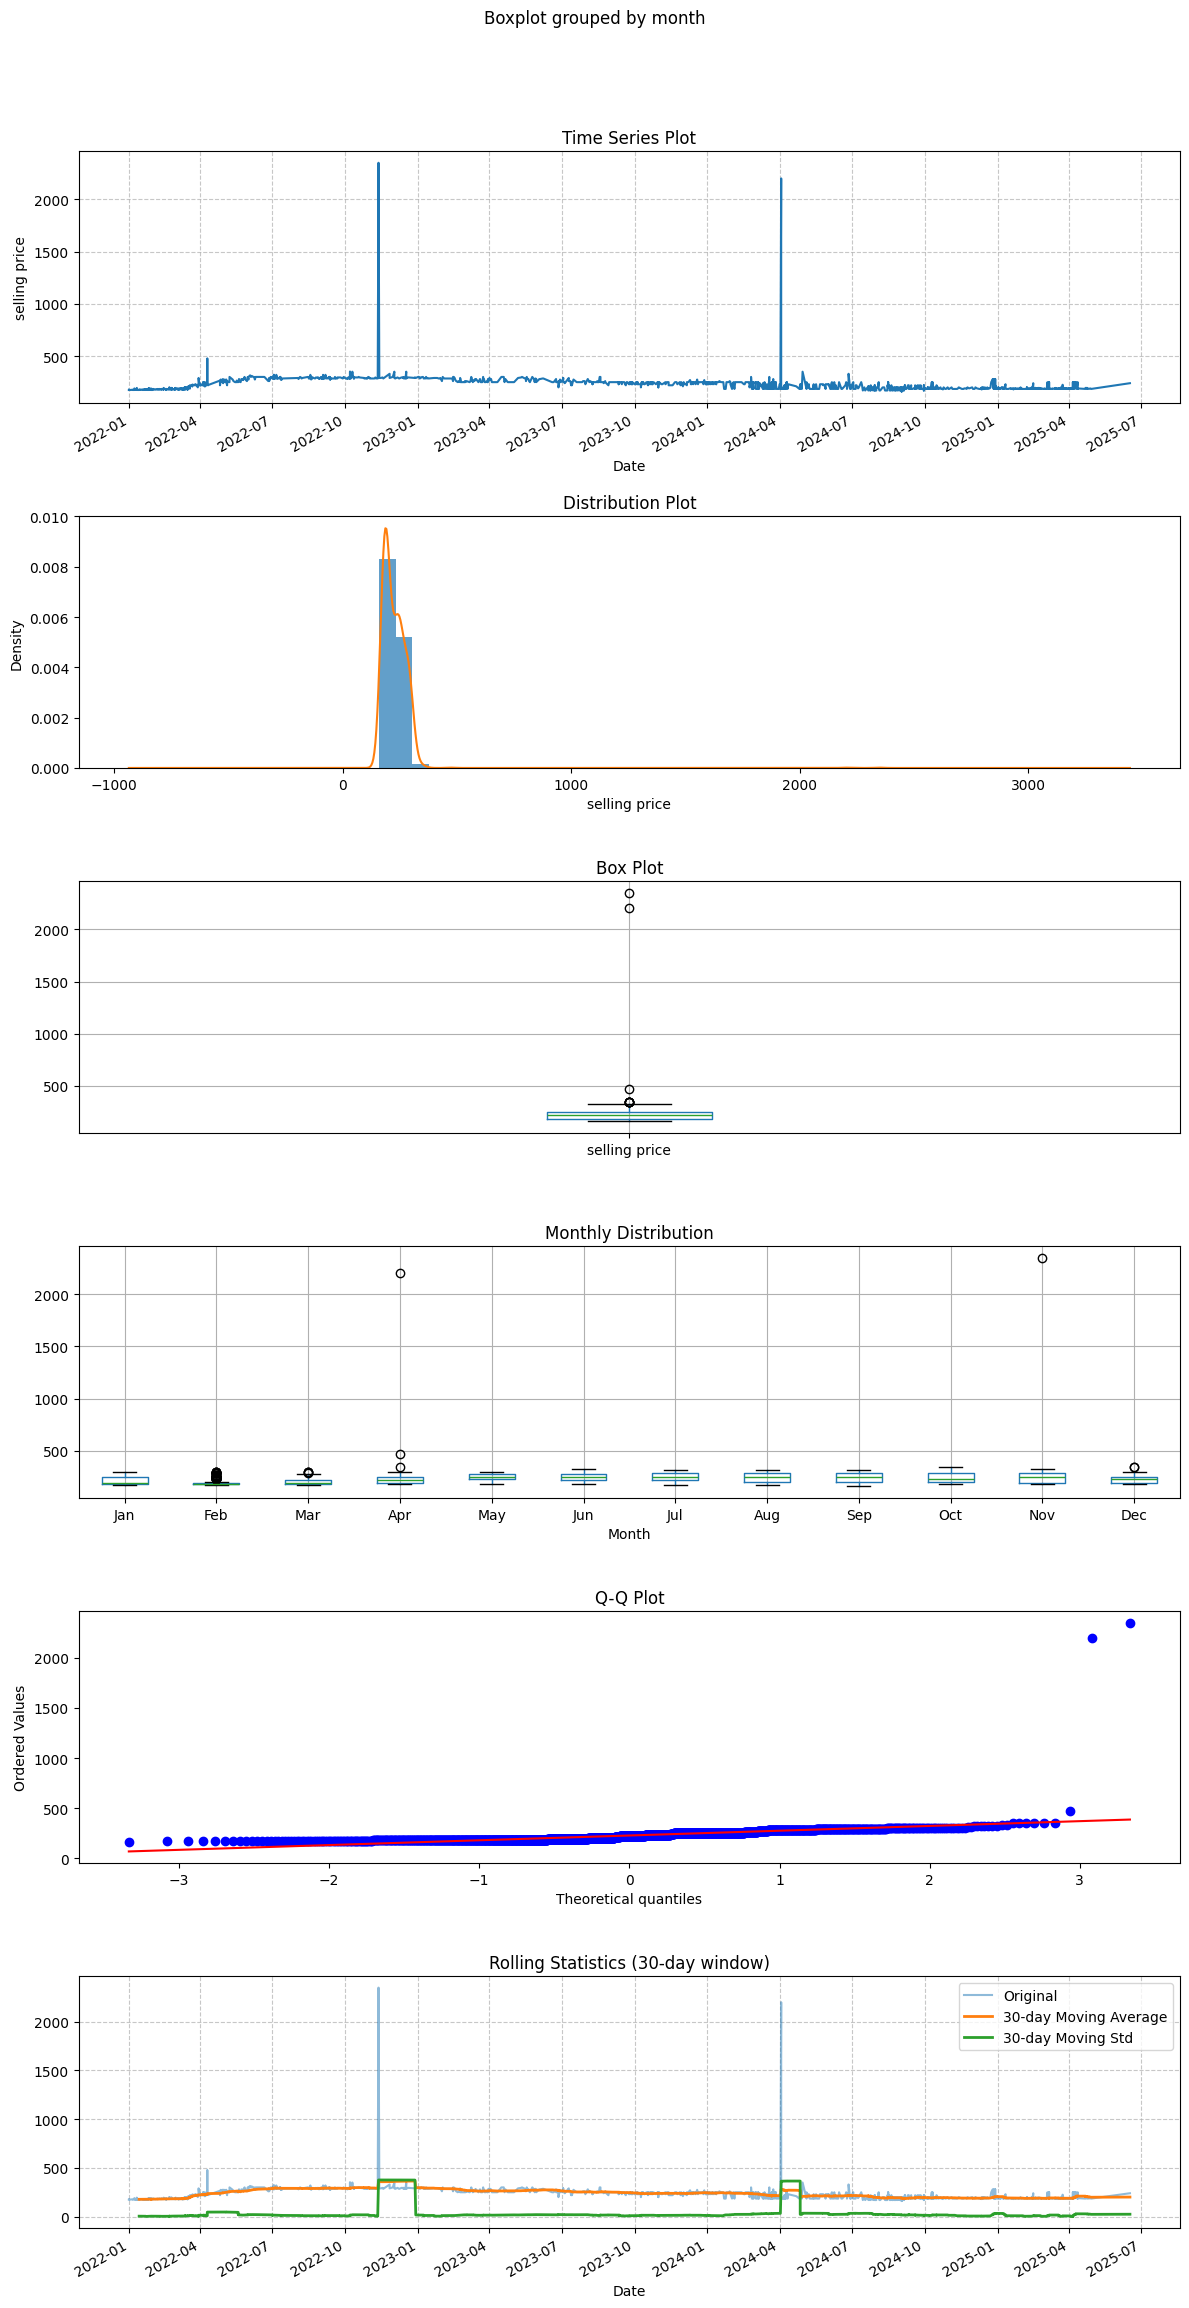

In [105]:
visualize_time_series(product_dataframes, best_selling_products.index[0], 'selling price')


Summary Statistics for Product P003:
----------------------------------------
count    1622.000000
mean      183.955610
std        32.357397
min        80.000000
25%       160.000000
50%       175.000000
75%       200.000000
max       250.000000
Name: cost price, dtype: float64

Stationarity Test (Augmented Dickey-Fuller):
ADF Statistic: -1.3264367522385487
p-value: 0.6169923706249025
ADF Statistic: -1.3264367522385487
p-value: 0.6169923706249025


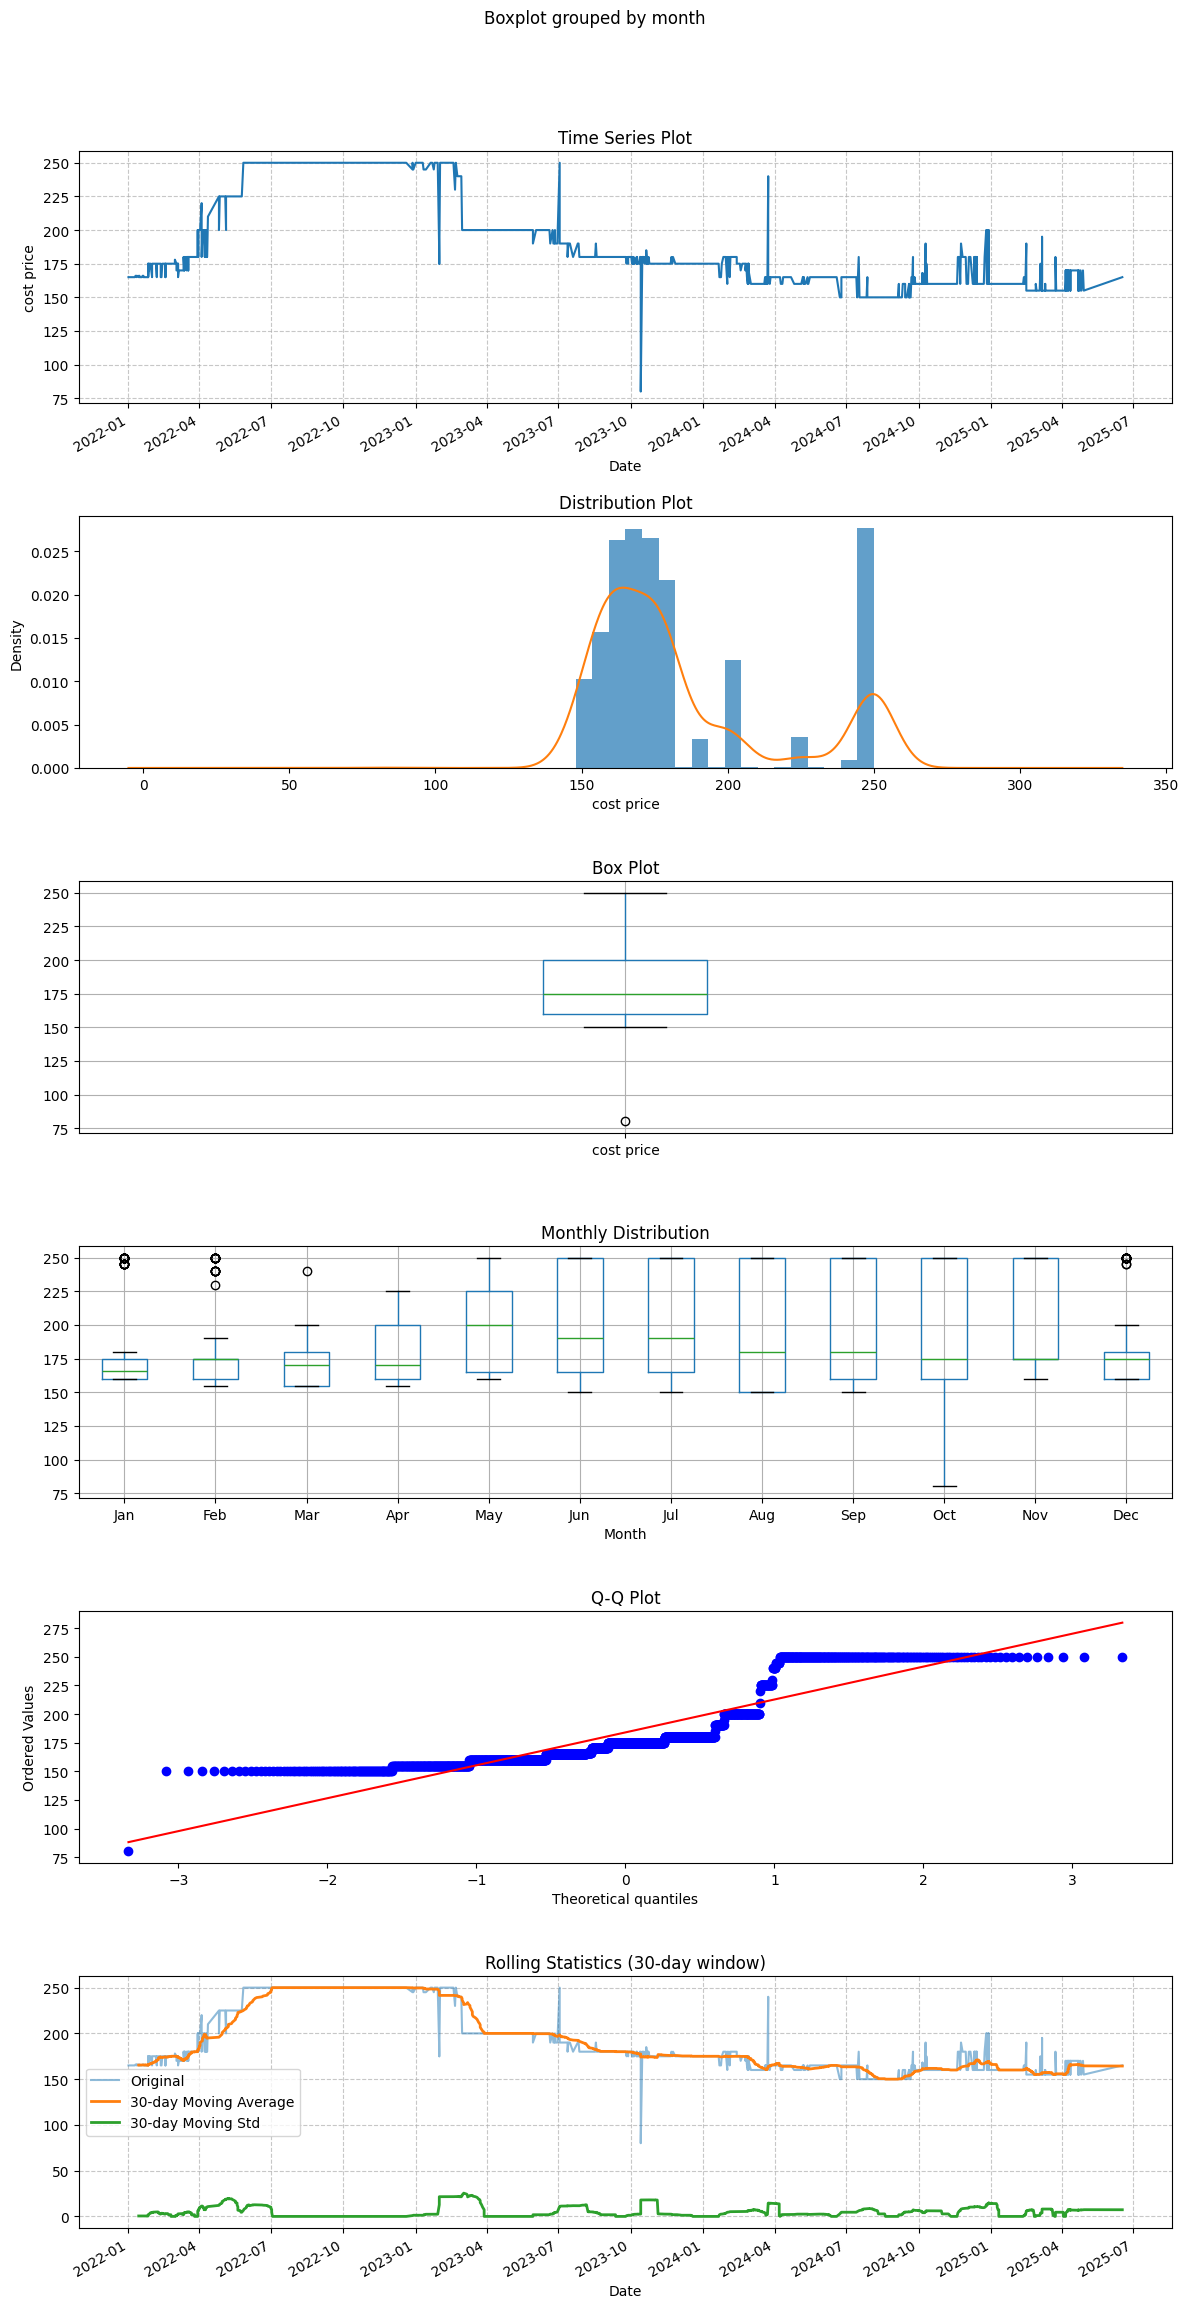

In [106]:
visualize_time_series(product_dataframes, best_selling_products.index[0], 'cost price')

##### Product: P001


Summary Statistics for Product P001:
----------------------------------------
count    1256.000000
mean      473.230096
std        90.336319
min       360.000000
25%       395.000000
50%       445.000000
75%       550.000000
max       750.000000
Name: selling price, dtype: float64

Stationarity Test (Augmented Dickey-Fuller):
ADF Statistic: -0.9868697826724598
p-value: 0.7580230710102369


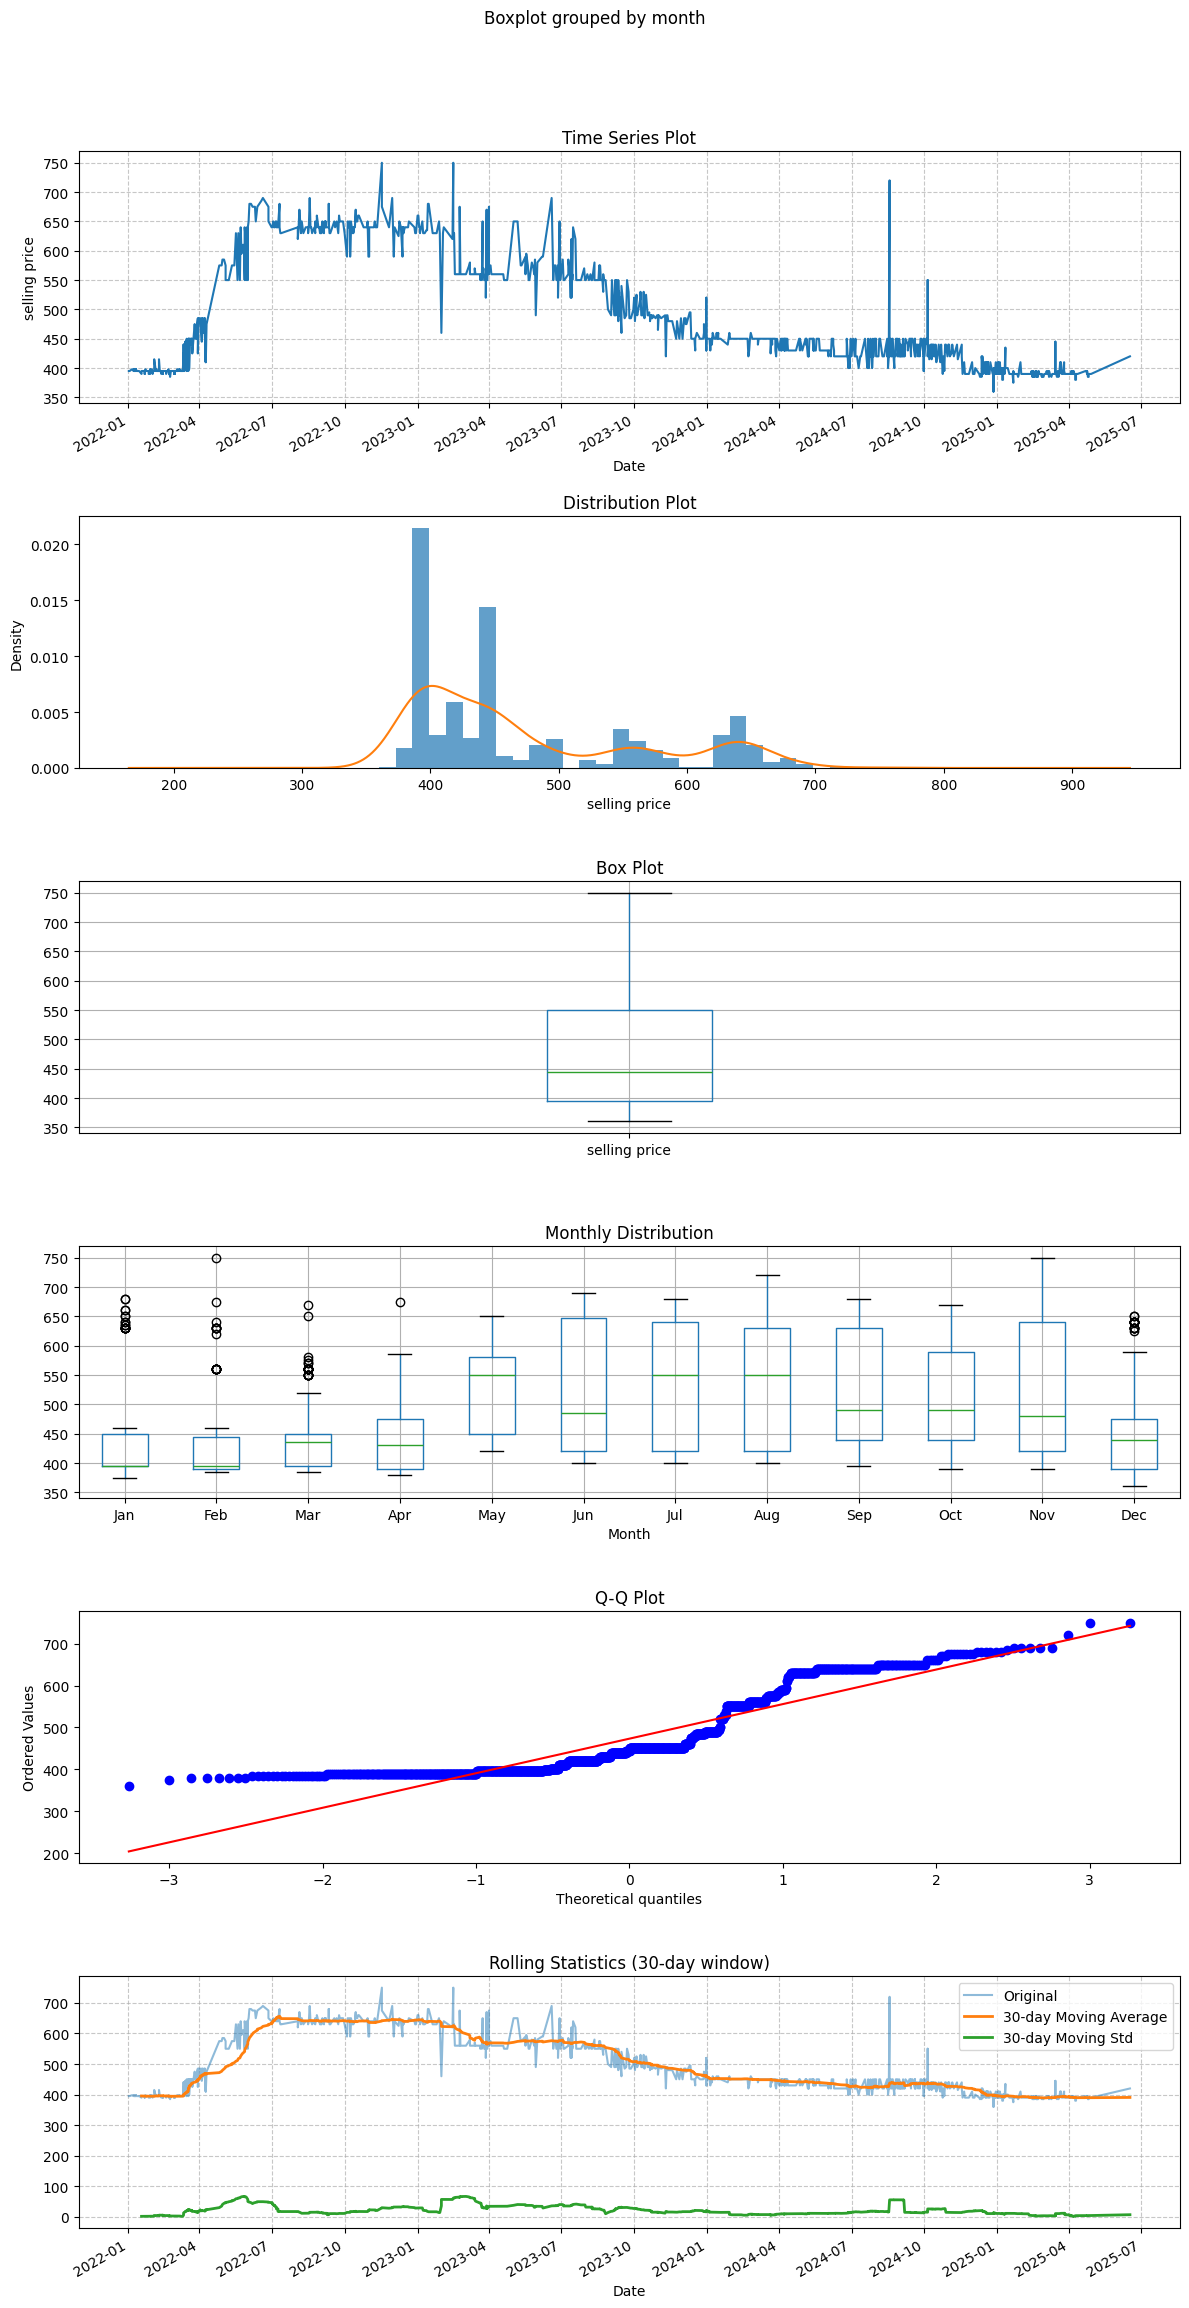

In [107]:
visualize_time_series(product_dataframes, best_selling_products.index[1], 'selling price')


Summary Statistics for Product P001:
----------------------------------------
count    1256.000000
mean      420.501592
std        79.654053
min       250.000000
25%       365.000000
50%       390.000000
75%       460.000000
max       610.000000
Name: cost price, dtype: float64

Stationarity Test (Augmented Dickey-Fuller):
ADF Statistic: -0.9812550316666282
p-value: 0.7600395567511101
ADF Statistic: -0.9812550316666282
p-value: 0.7600395567511101


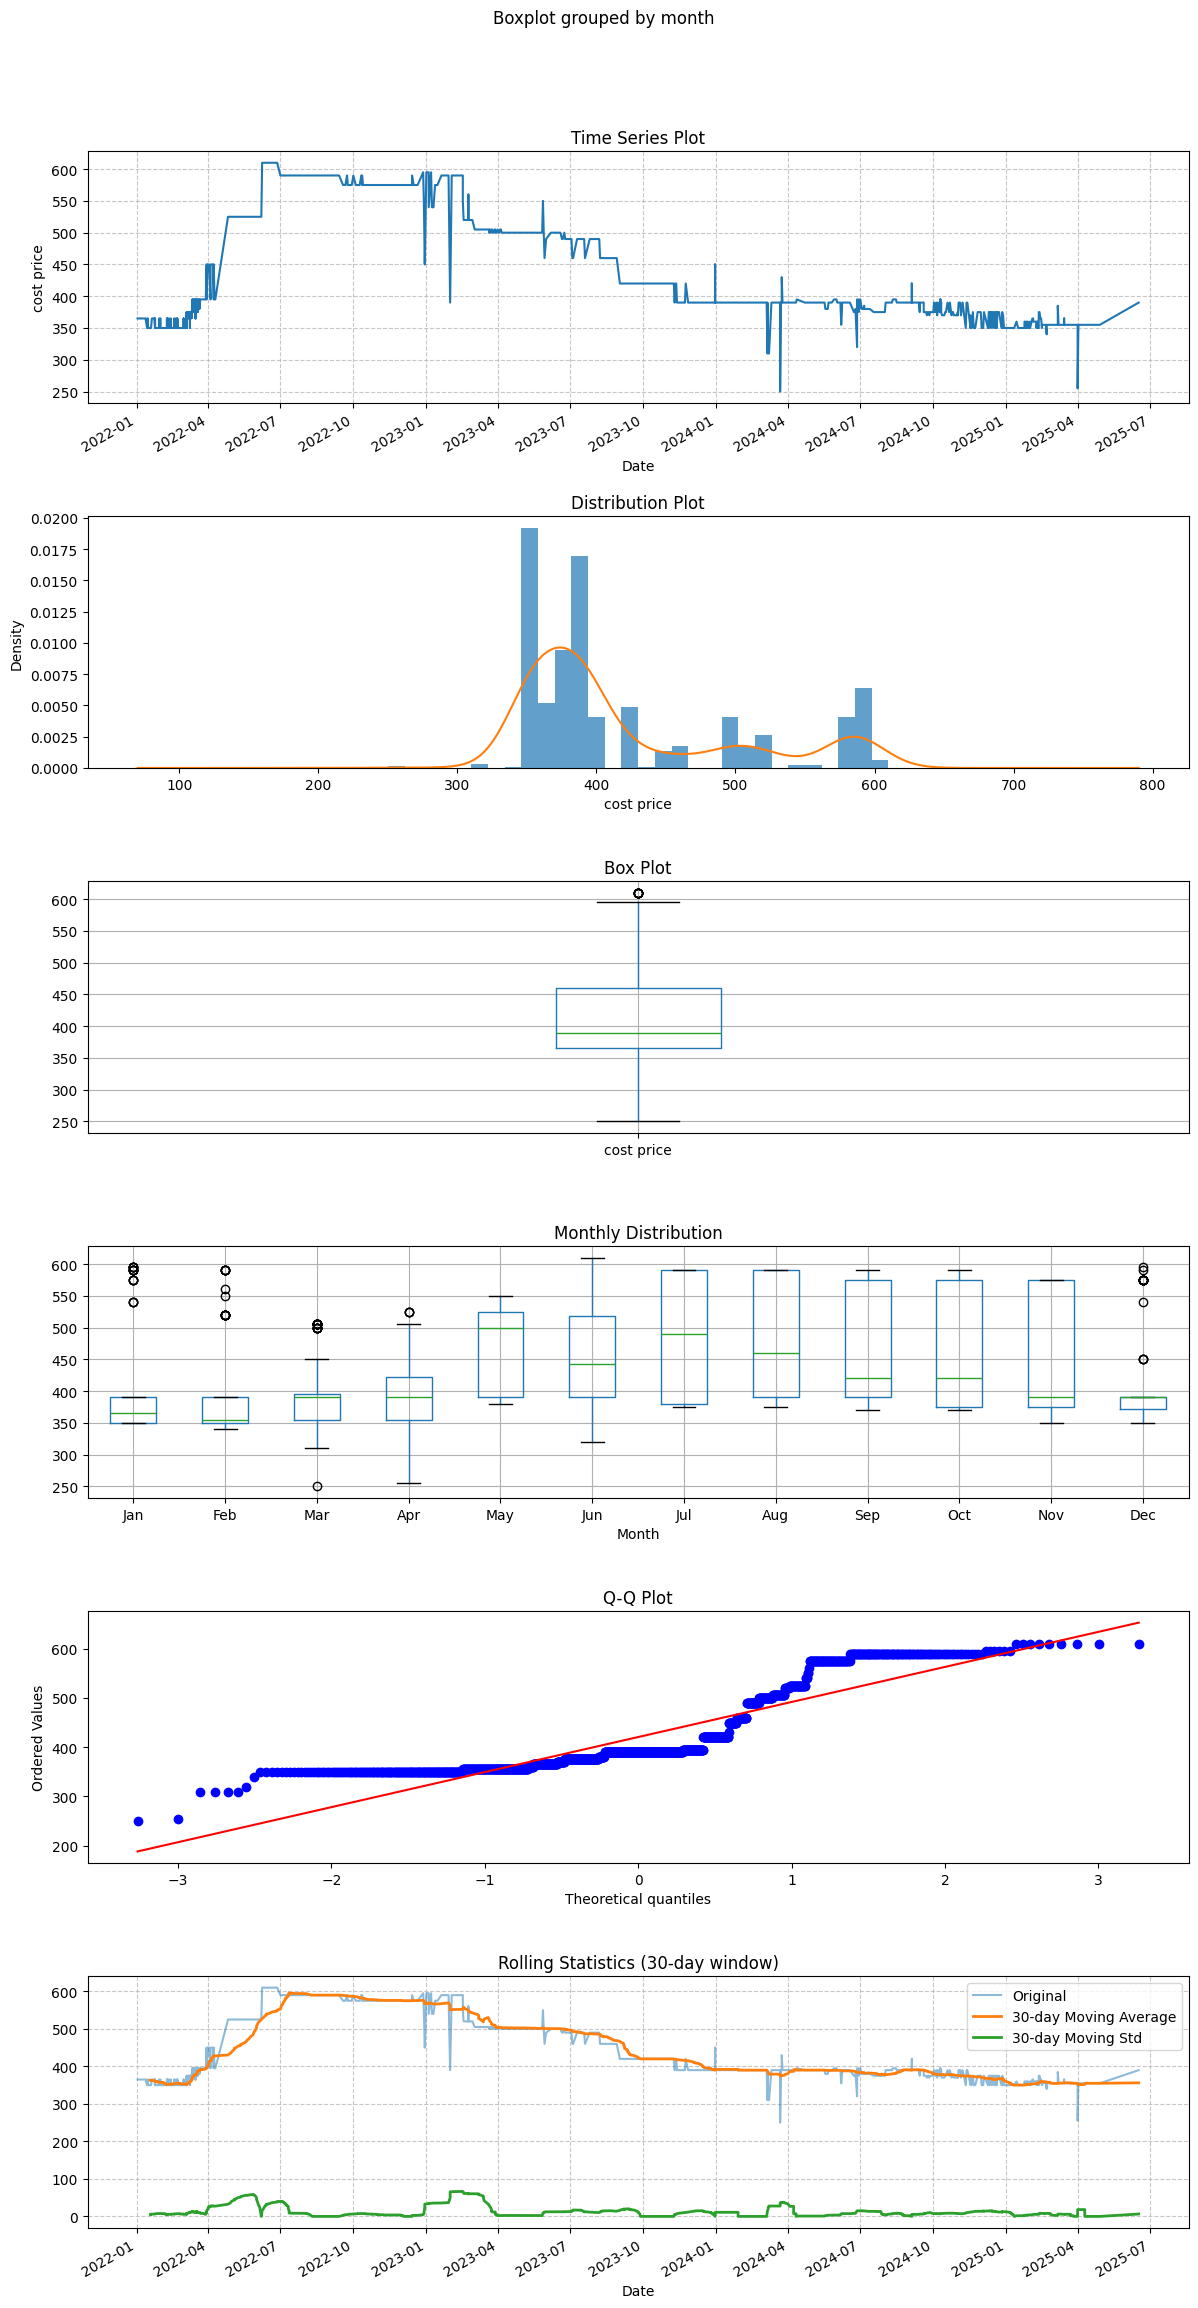

In [108]:
visualize_time_series(product_dataframes, best_selling_products.index[1], 'cost price')

##### Product: P012


Summary Statistics for Product P012:
----------------------------------------
count    1215.000000
mean     1919.144033
std       605.924933
min       500.000000
25%      1500.000000
50%      1850.000000
75%      2500.000000
max      4850.000000
Name: selling price, dtype: float64

Stationarity Test (Augmented Dickey-Fuller):
ADF Statistic: -2.954685125398093
p-value: 0.03934844723238903


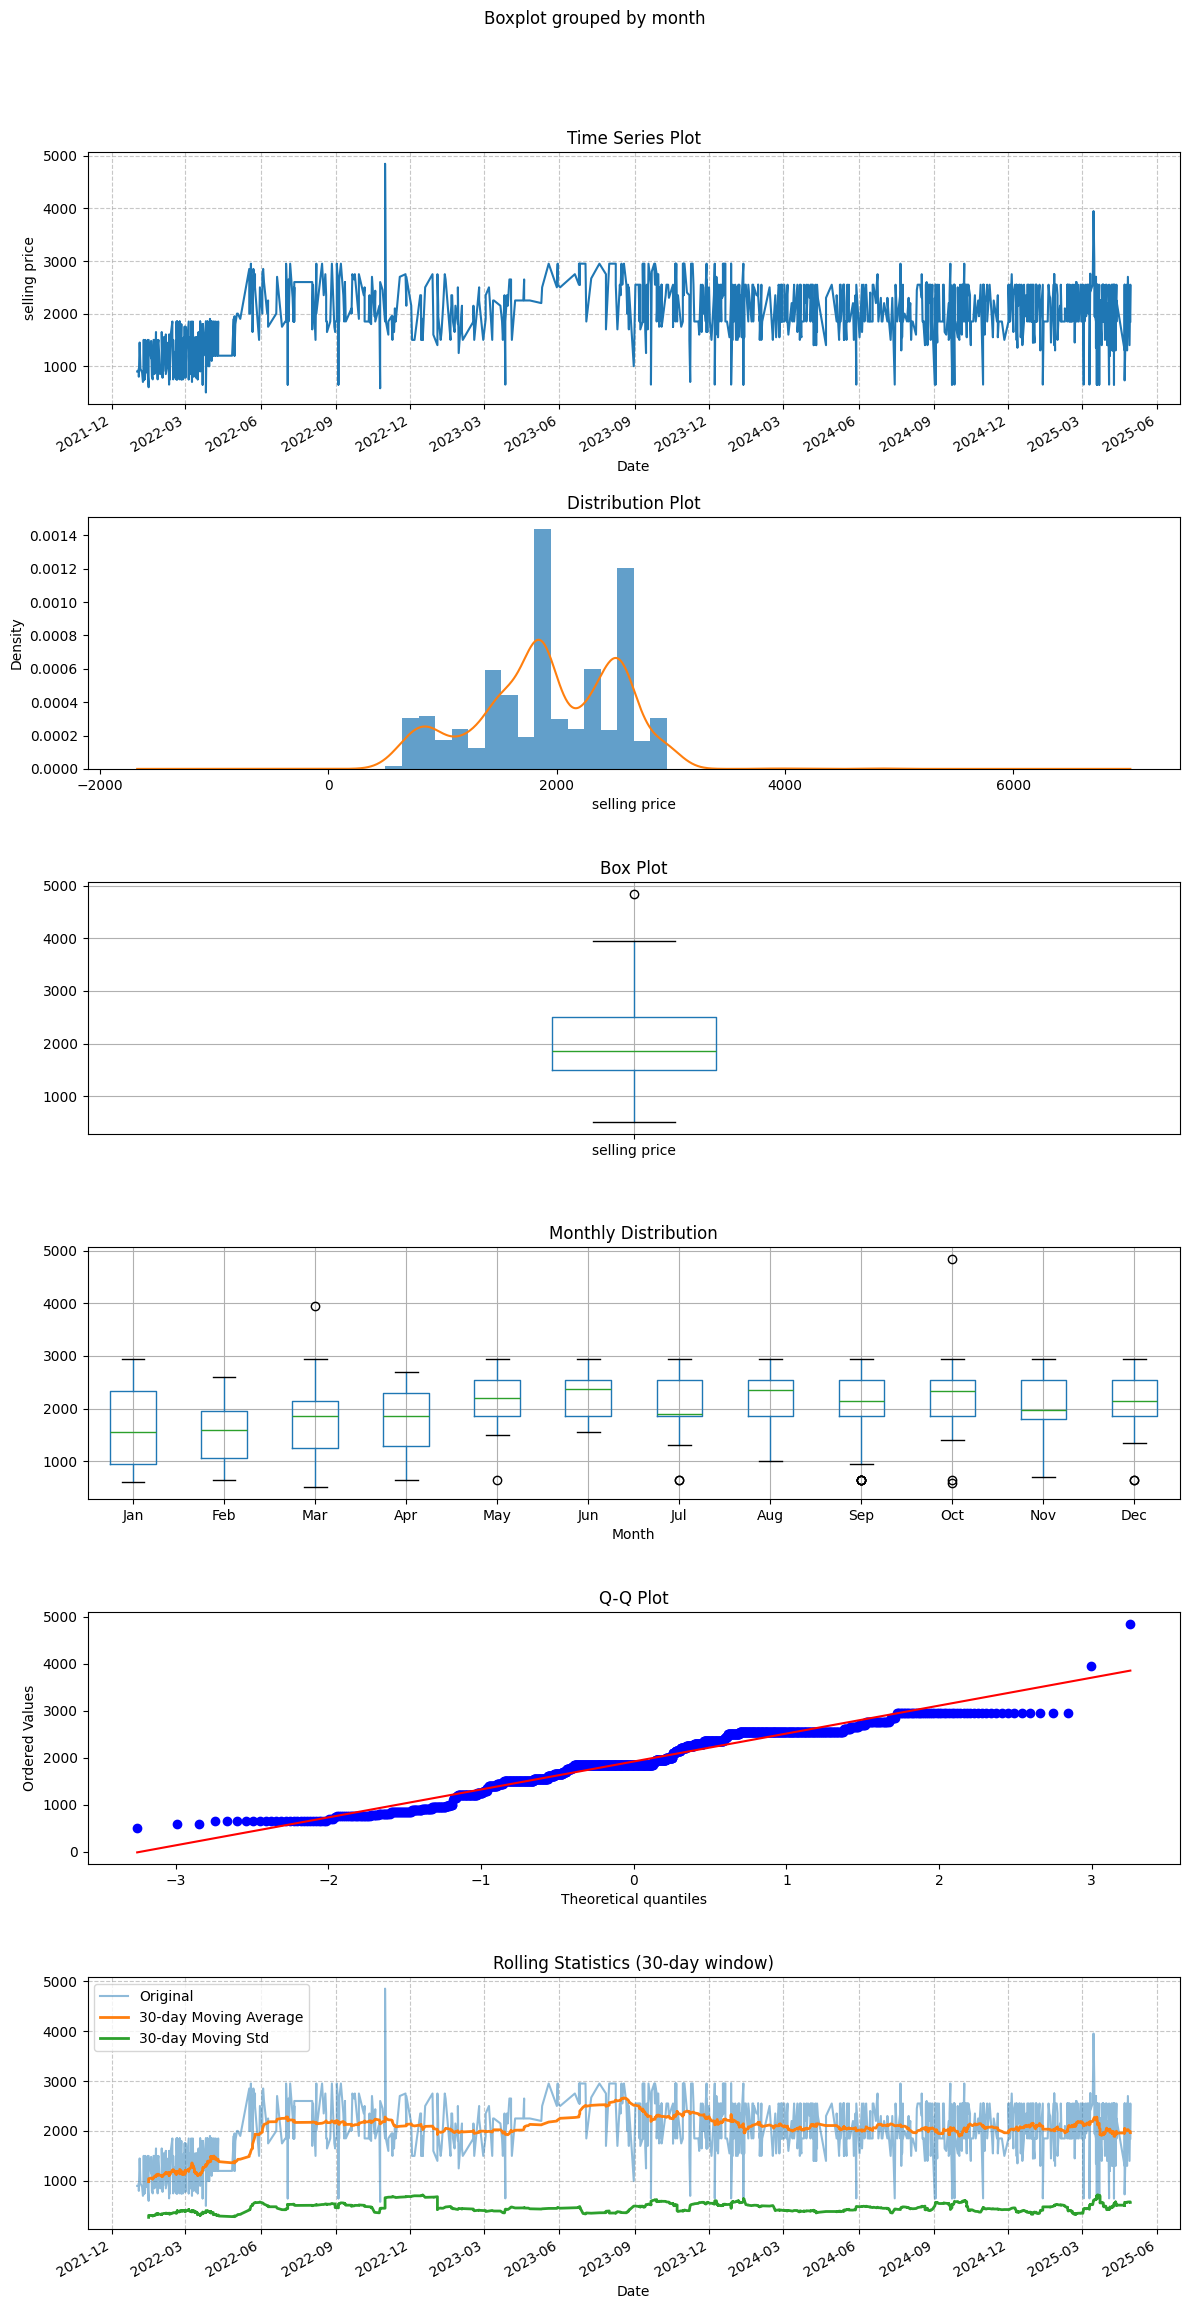

In [109]:
visualize_time_series(product_dataframes, best_selling_products.index[2], 'selling price')


Summary Statistics for Product P012:
----------------------------------------
count    1215.000000
mean     1132.448560
std       372.749304
min         0.000000
25%       850.000000
50%      1150.000000
75%      1350.000000
max      3448.000000
Name: cost price, dtype: float64

Stationarity Test (Augmented Dickey-Fuller):
ADF Statistic: -3.1322826179777996
p-value: 0.02425455460221414


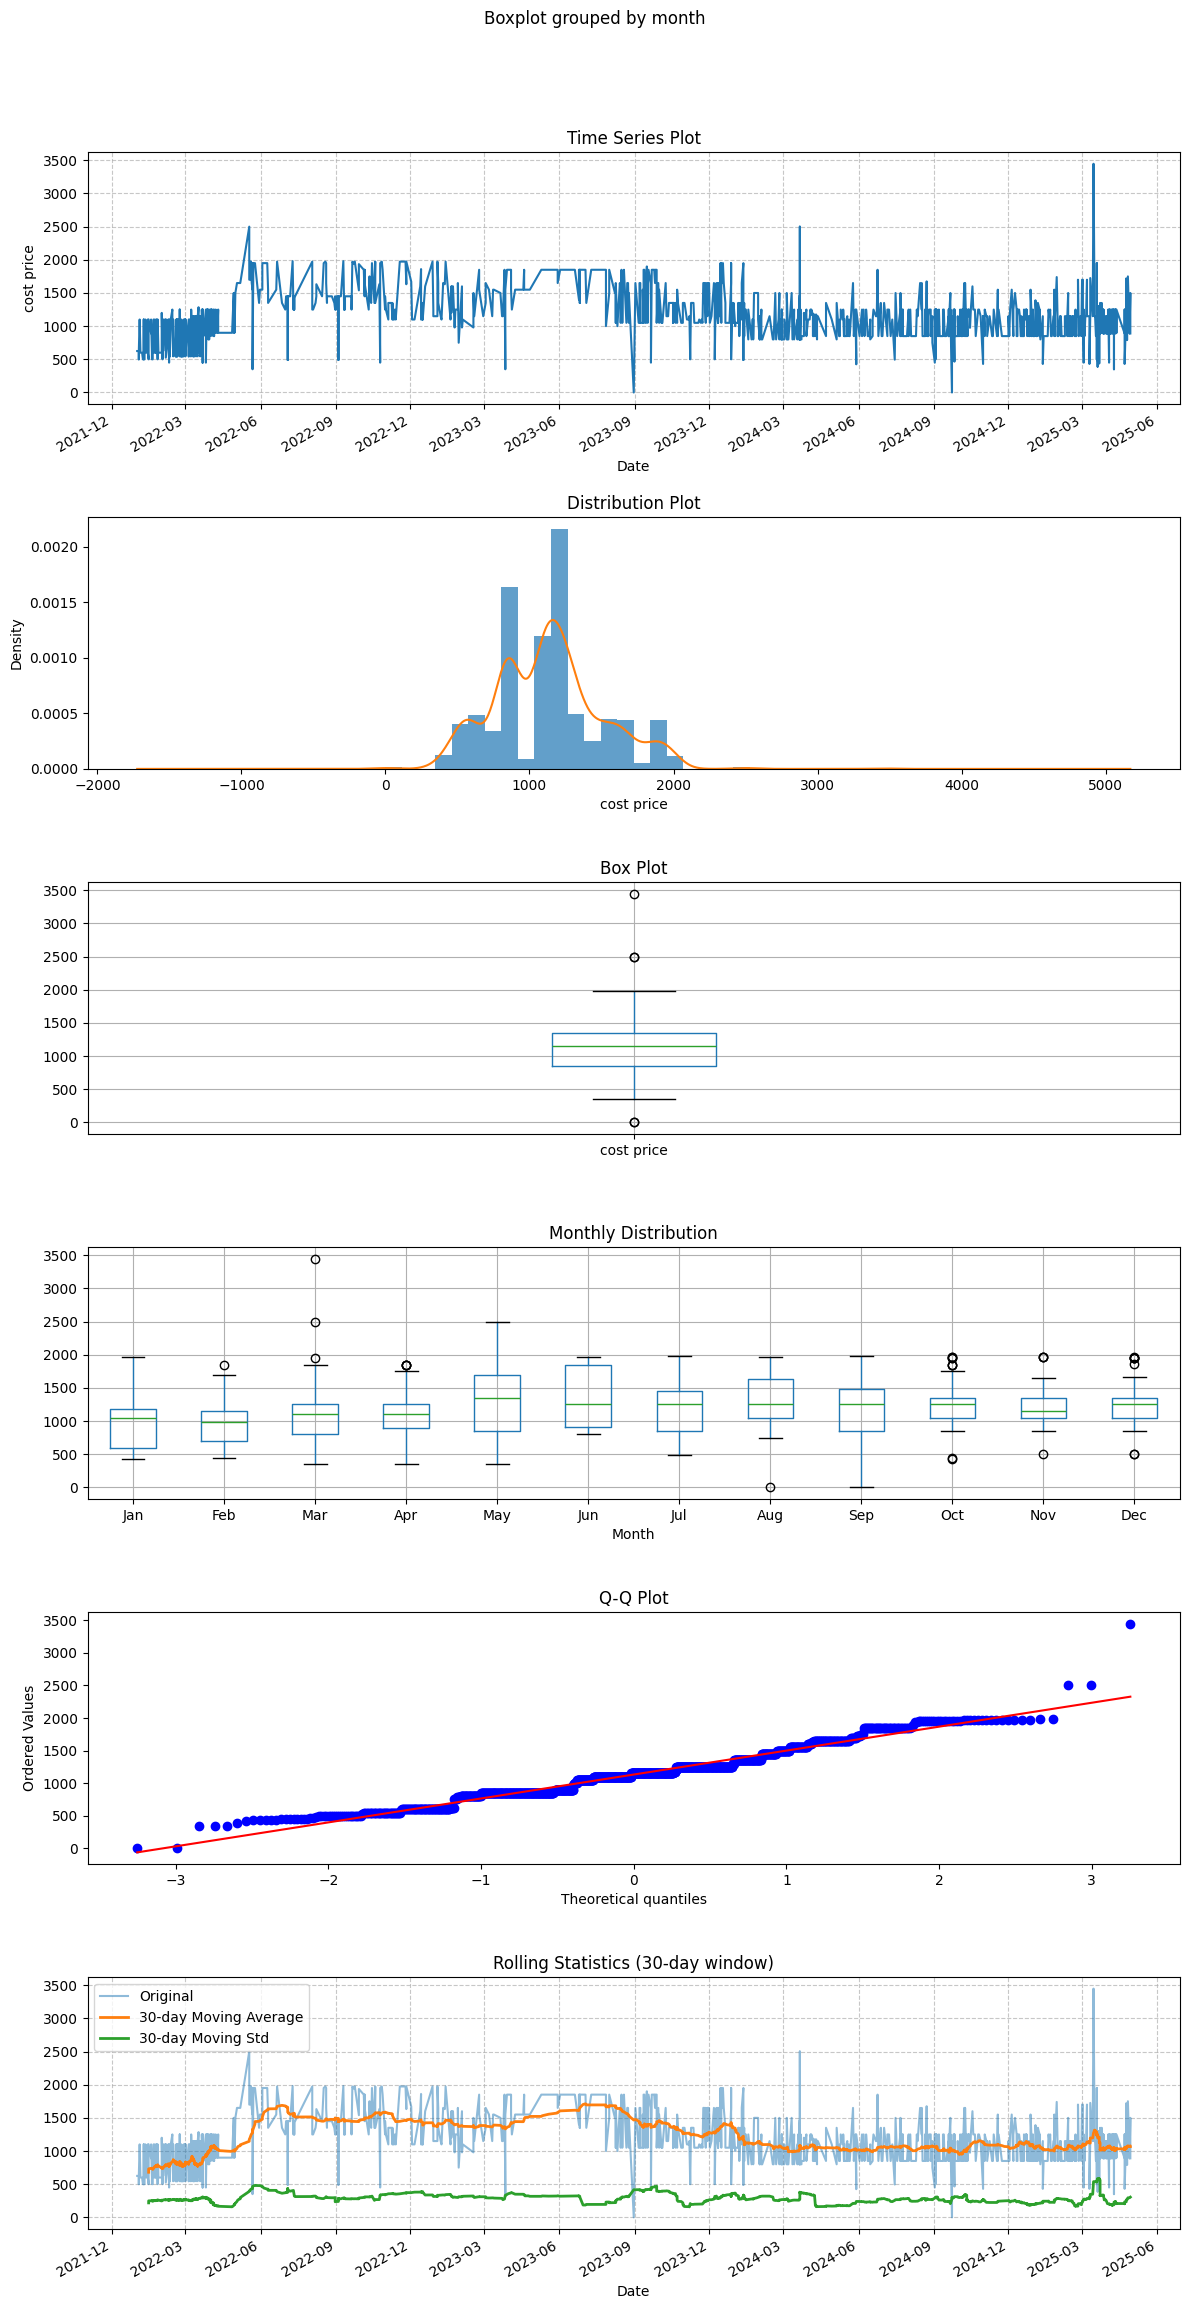

In [110]:
visualize_time_series(product_dataframes, best_selling_products.index[2], 'cost price')

##### Product: P002


Summary Statistics for Product P002:
----------------------------------------
count    1159.000000
mean       81.176014
std        16.802369
min        60.000000
25%        68.000000
50%        75.000000
75%        90.000000
max       220.000000
Name: selling price, dtype: float64

Stationarity Test (Augmented Dickey-Fuller):
ADF Statistic: -0.934258597959184
p-value: 0.7764813678204343
ADF Statistic: -0.934258597959184
p-value: 0.7764813678204343


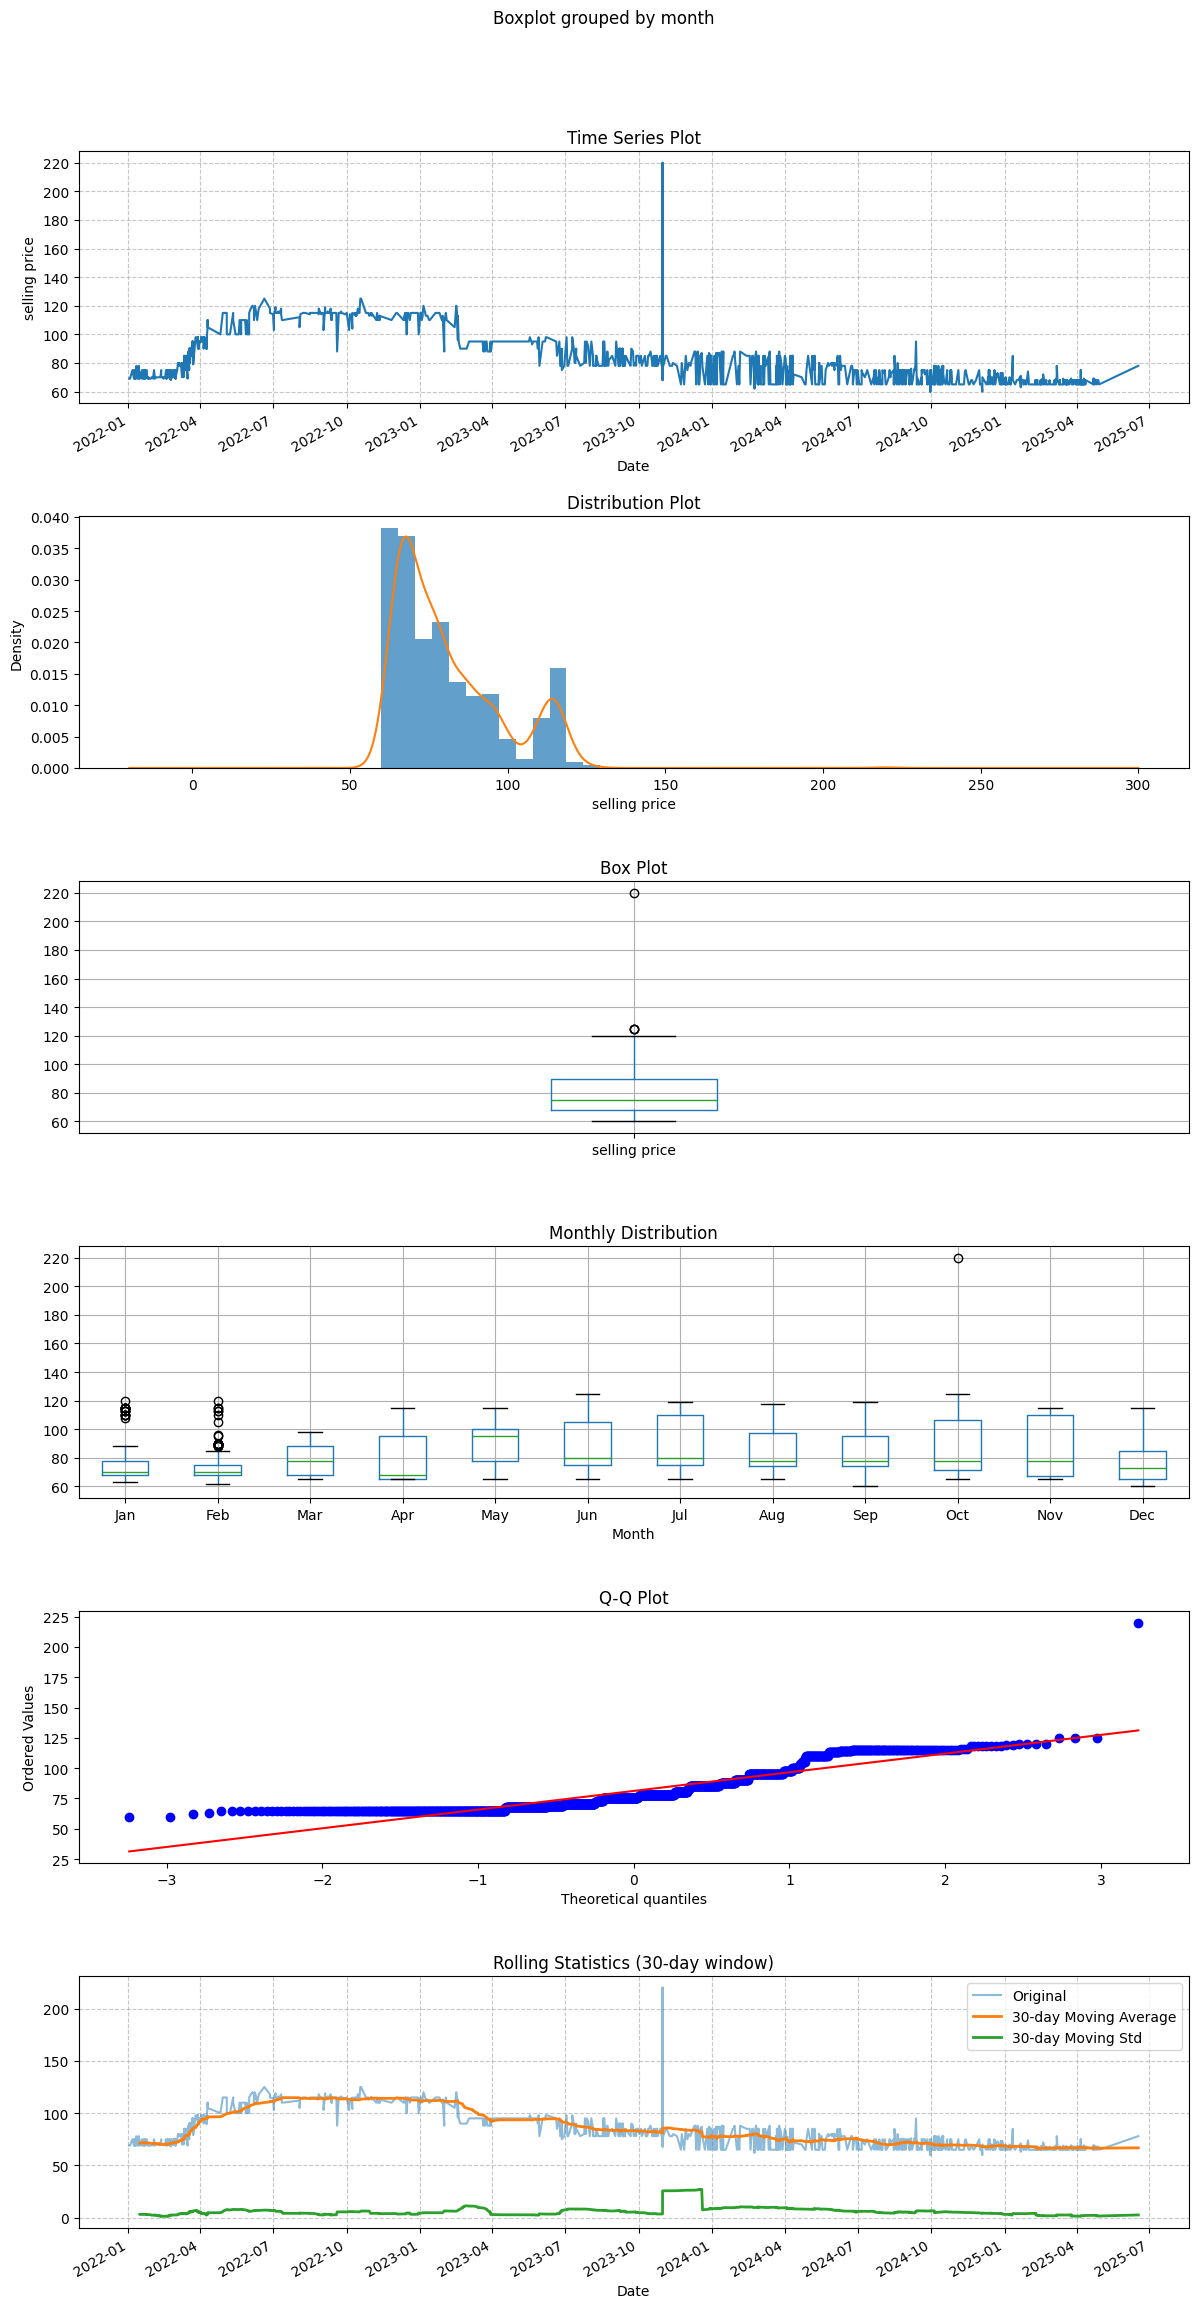

In [111]:
visualize_time_series(product_dataframes, best_selling_products.index[3], 'selling price')


Summary Statistics for Product P002:
----------------------------------------
count    1159.000000
mean       66.823986
std        15.706728
min        15.000000
25%        57.000000
50%        59.000000
75%        70.000000
max       175.000000
Name: cost price, dtype: float64

Stationarity Test (Augmented Dickey-Fuller):
ADF Statistic: -1.1103753347550973
p-value: 0.7109166556781539


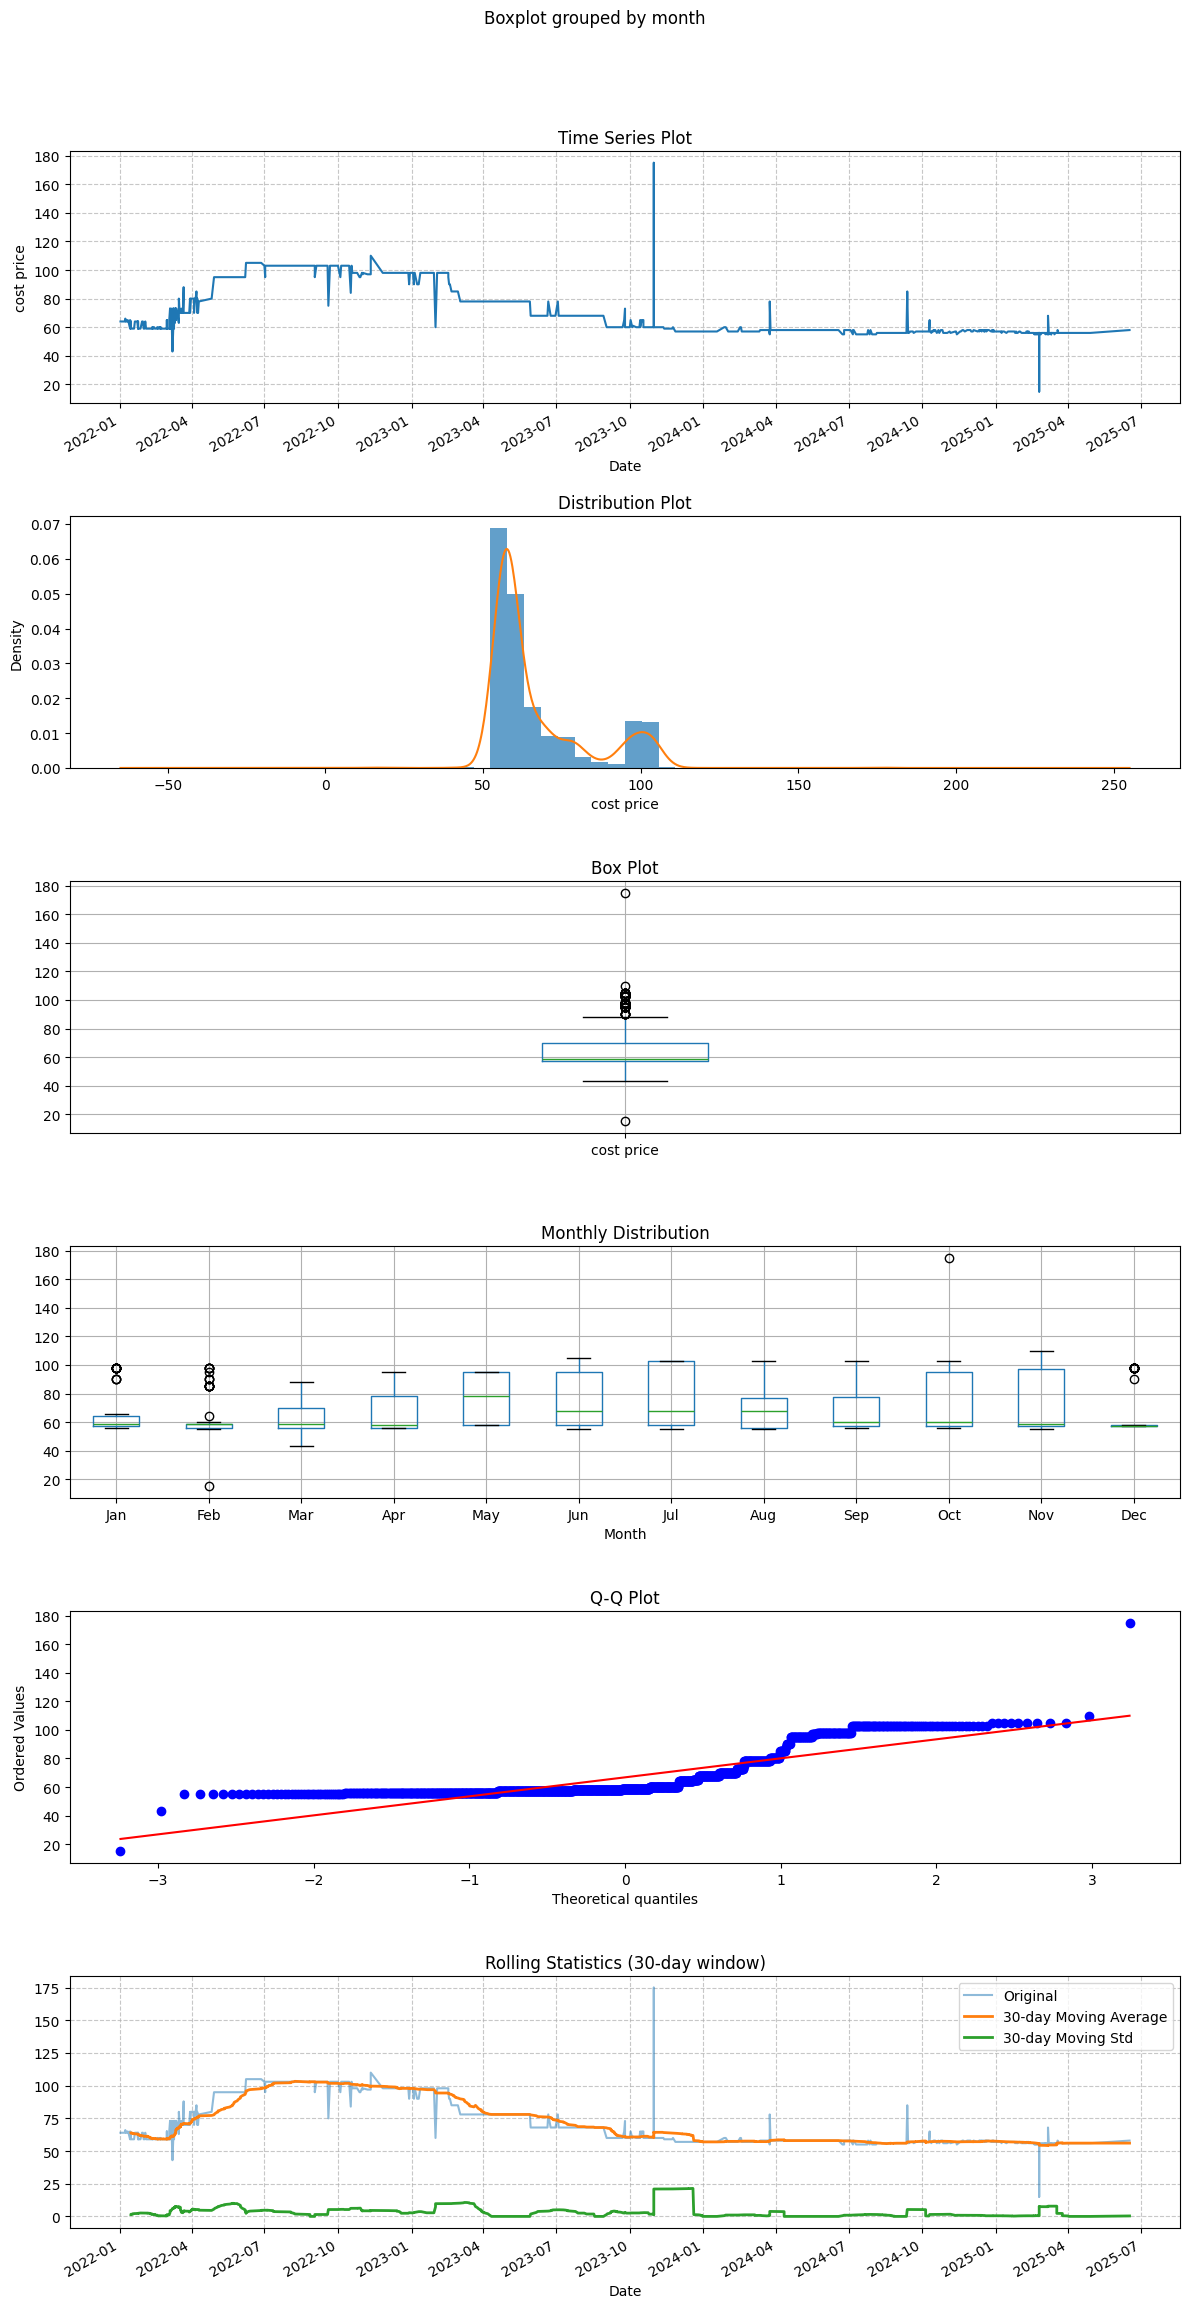

In [112]:
visualize_time_series(product_dataframes, best_selling_products.index[3], 'cost price')

##### Product: P007


Summary Statistics for Product P007:
----------------------------------------
count    1111.000000
mean      607.272727
std       109.760330
min        60.000000
25%       550.000000
50%       580.000000
75%       650.000000
max       880.000000
Name: selling price, dtype: float64

Stationarity Test (Augmented Dickey-Fuller):
ADF Statistic: -1.9928877159550082
p-value: 0.289700268797196
ADF Statistic: -1.9928877159550082
p-value: 0.289700268797196


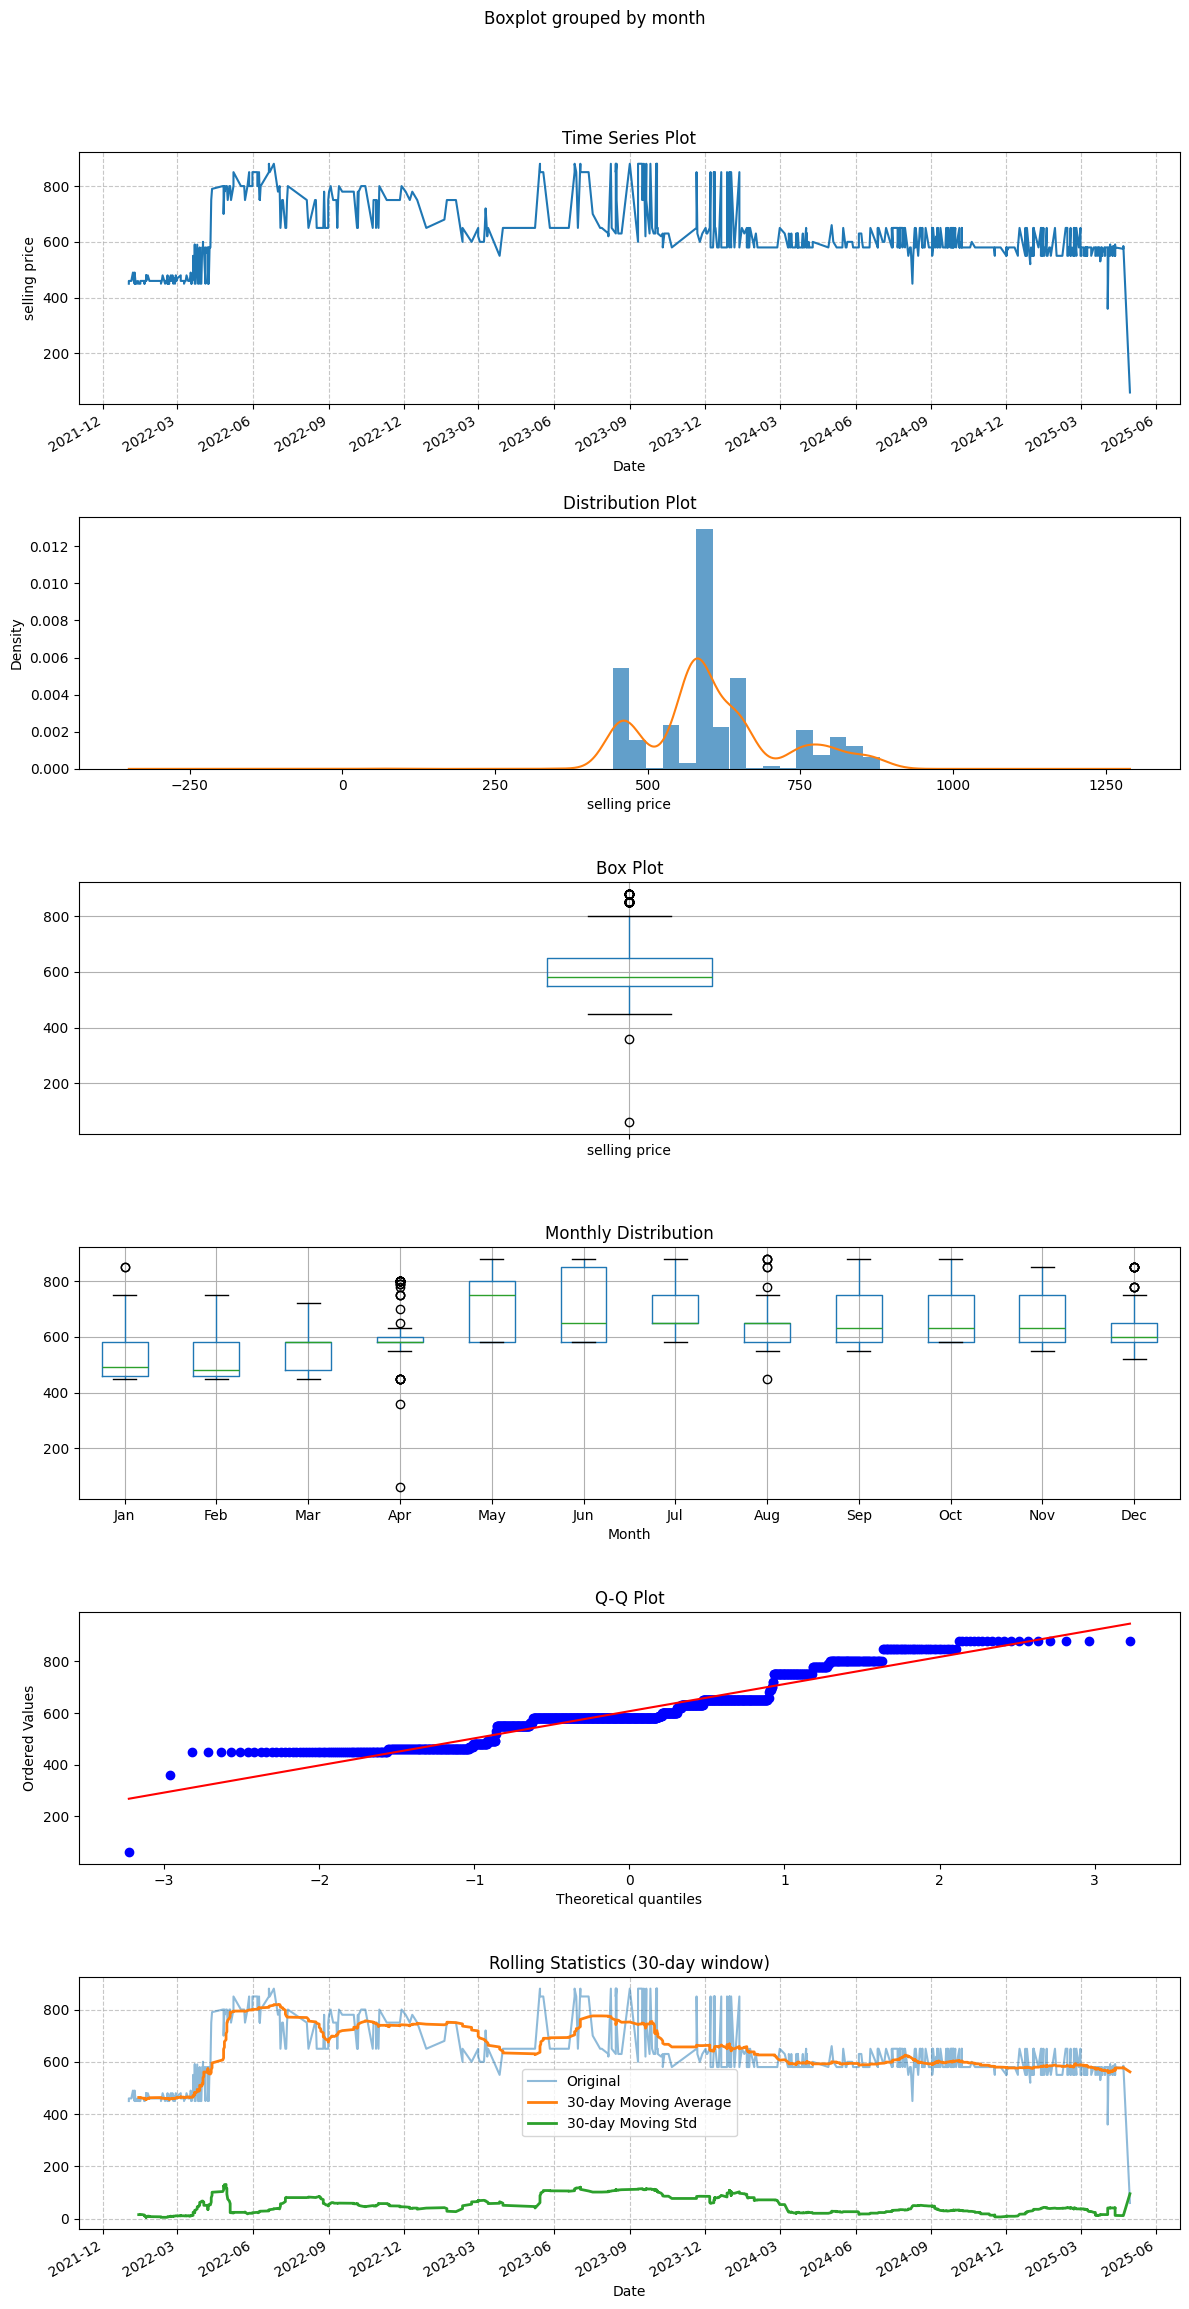

In [113]:
visualize_time_series(product_dataframes, best_selling_products.index[4], 'selling price')


Summary Statistics for Product P007:
----------------------------------------
count    1111.000000
mean      431.220522
std       121.963829
min        39.000000
25%       390.000000
50%       400.000000
75%       450.000000
max      3395.000000
Name: cost price, dtype: float64

Stationarity Test (Augmented Dickey-Fuller):
ADF Statistic: -3.981753172740728
p-value: 0.001509129249944345


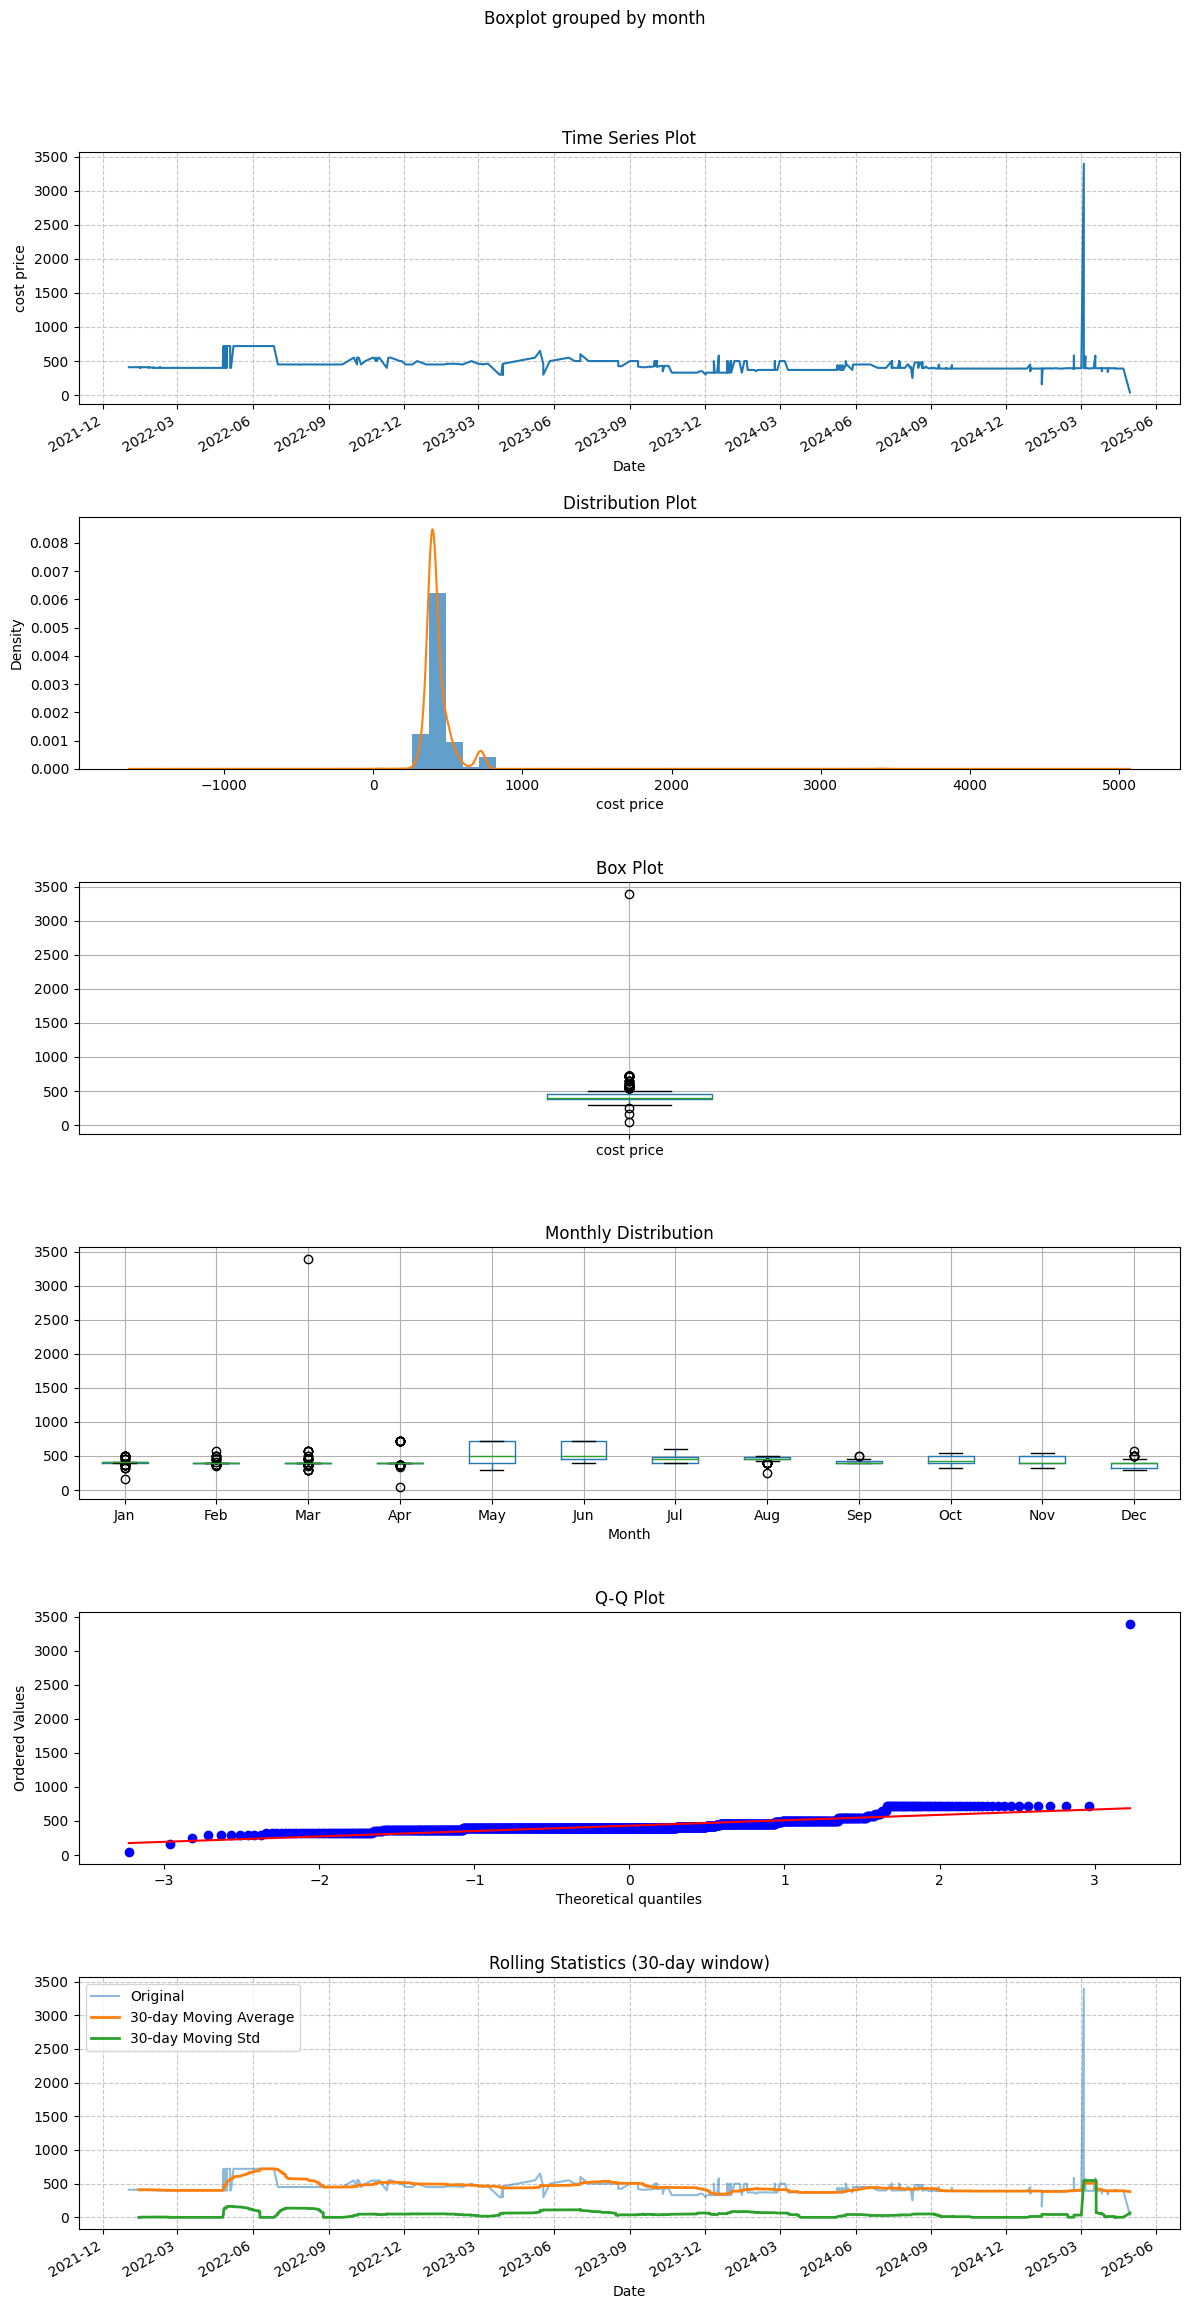

In [114]:
visualize_time_series(product_dataframes, best_selling_products.index[4], 'cost price')

##### Product: P004


Summary Statistics for Product P004:
----------------------------------------
count    1067.000000
mean      385.509466
std       105.244288
min       165.000000
25%       355.000000
50%       375.000000
75%       395.000000
max      3330.000000
Name: selling price, dtype: float64

Stationarity Test (Augmented Dickey-Fuller):
ADF Statistic: -3.342195243332319
p-value: 0.013094529041376908
ADF Statistic: -3.342195243332319
p-value: 0.013094529041376908


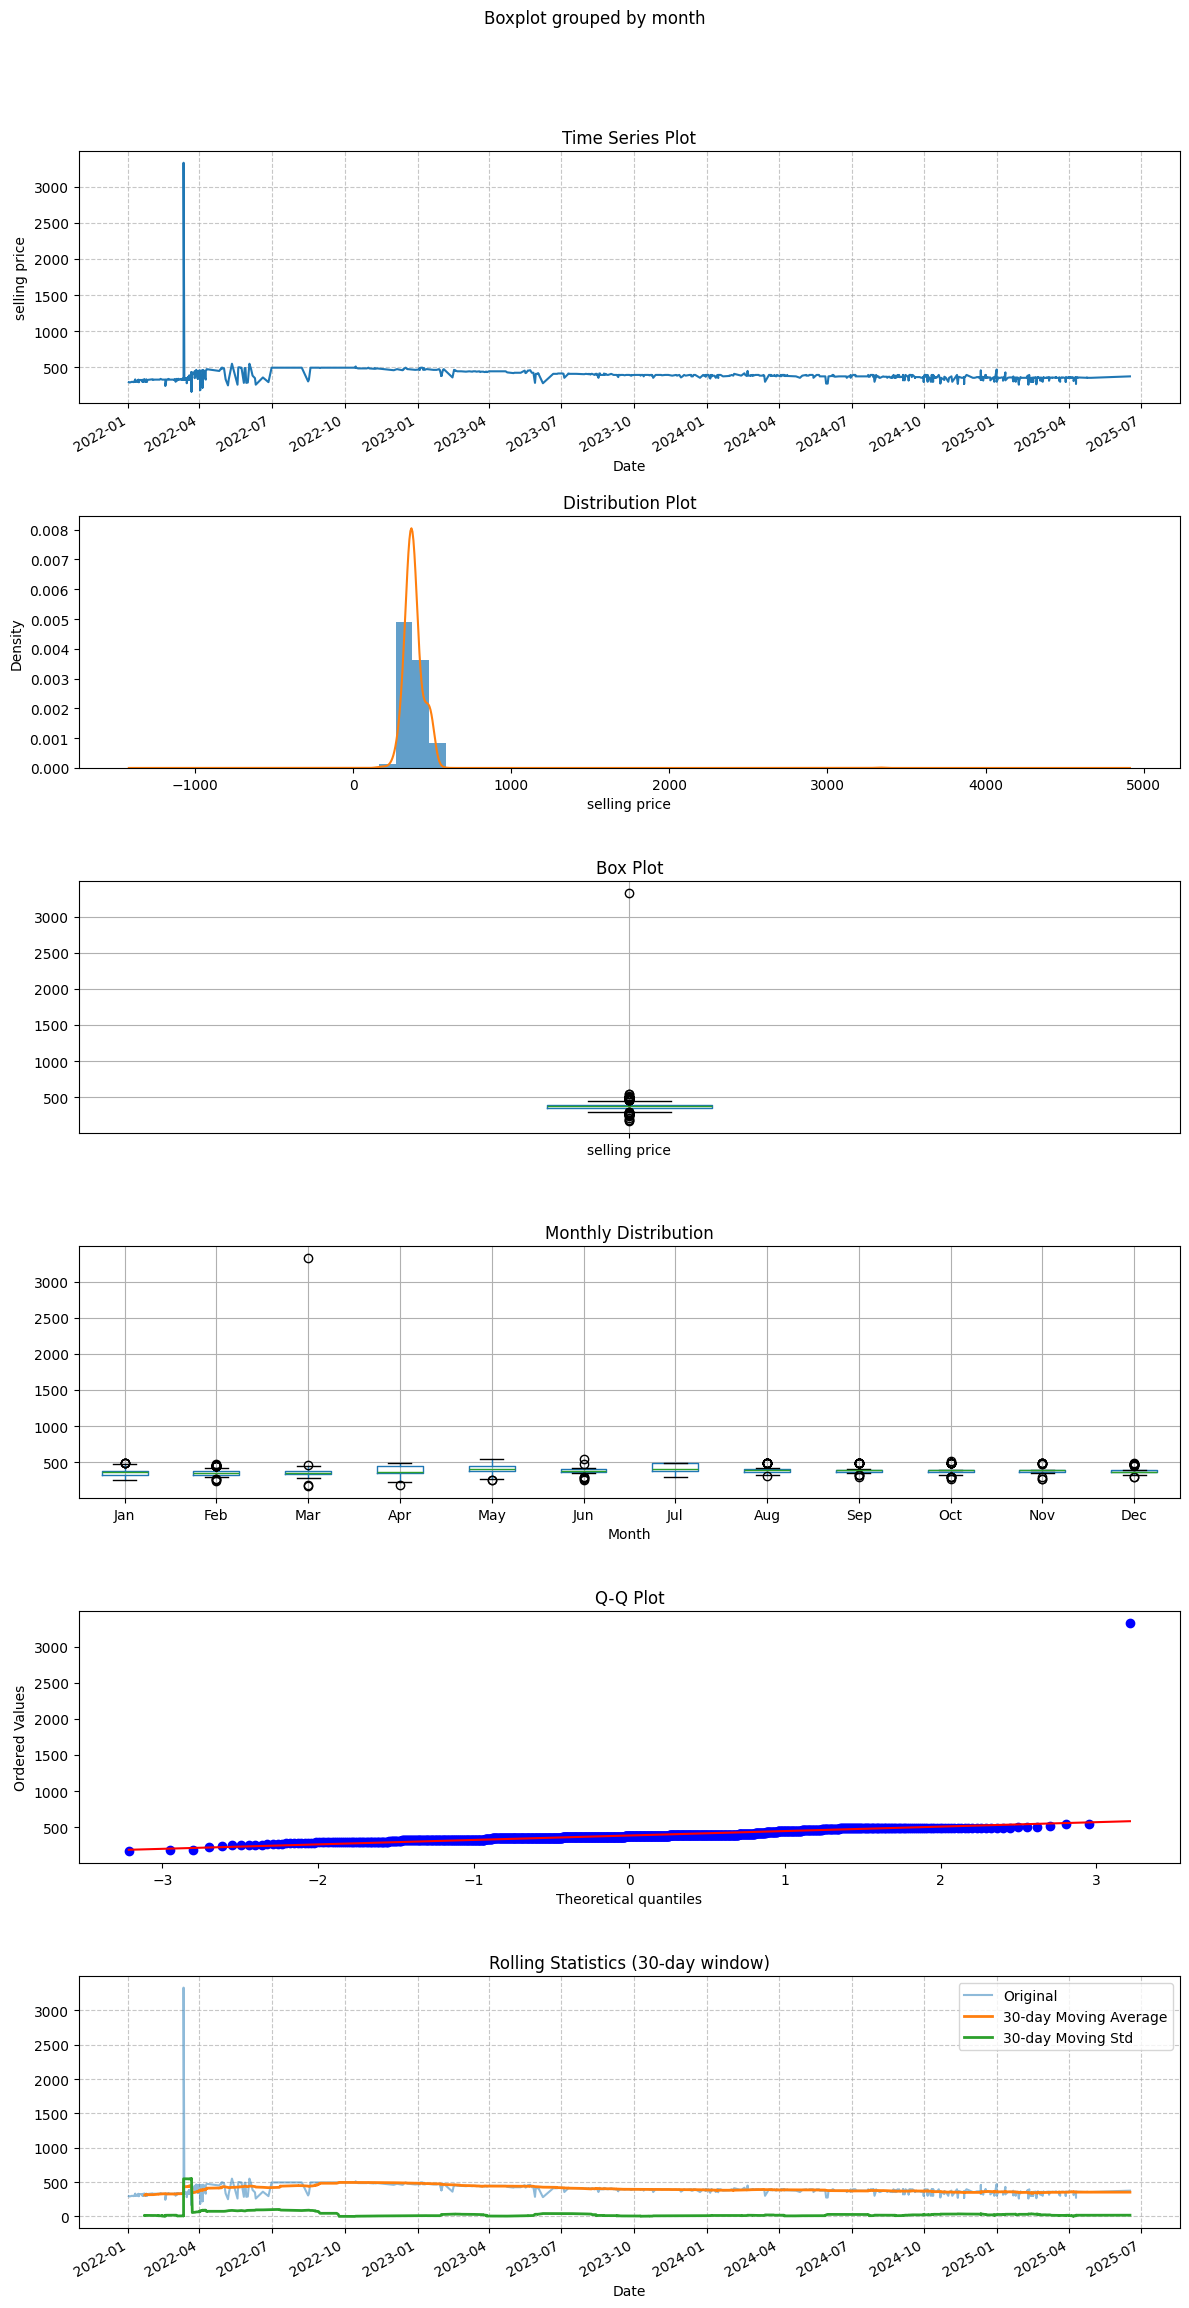

In [115]:
visualize_time_series(product_dataframes, best_selling_products.index[5], 'selling price')


Summary Statistics for Product P004:
----------------------------------------
count    1067.000000
mean      349.862231
std        51.244043
min        41.000000
25%       315.000000
50%       350.000000
75%       370.000000
max       465.000000
Name: cost price, dtype: float64

Stationarity Test (Augmented Dickey-Fuller):
ADF Statistic: -2.0325128942375508
p-value: 0.2725017370016684


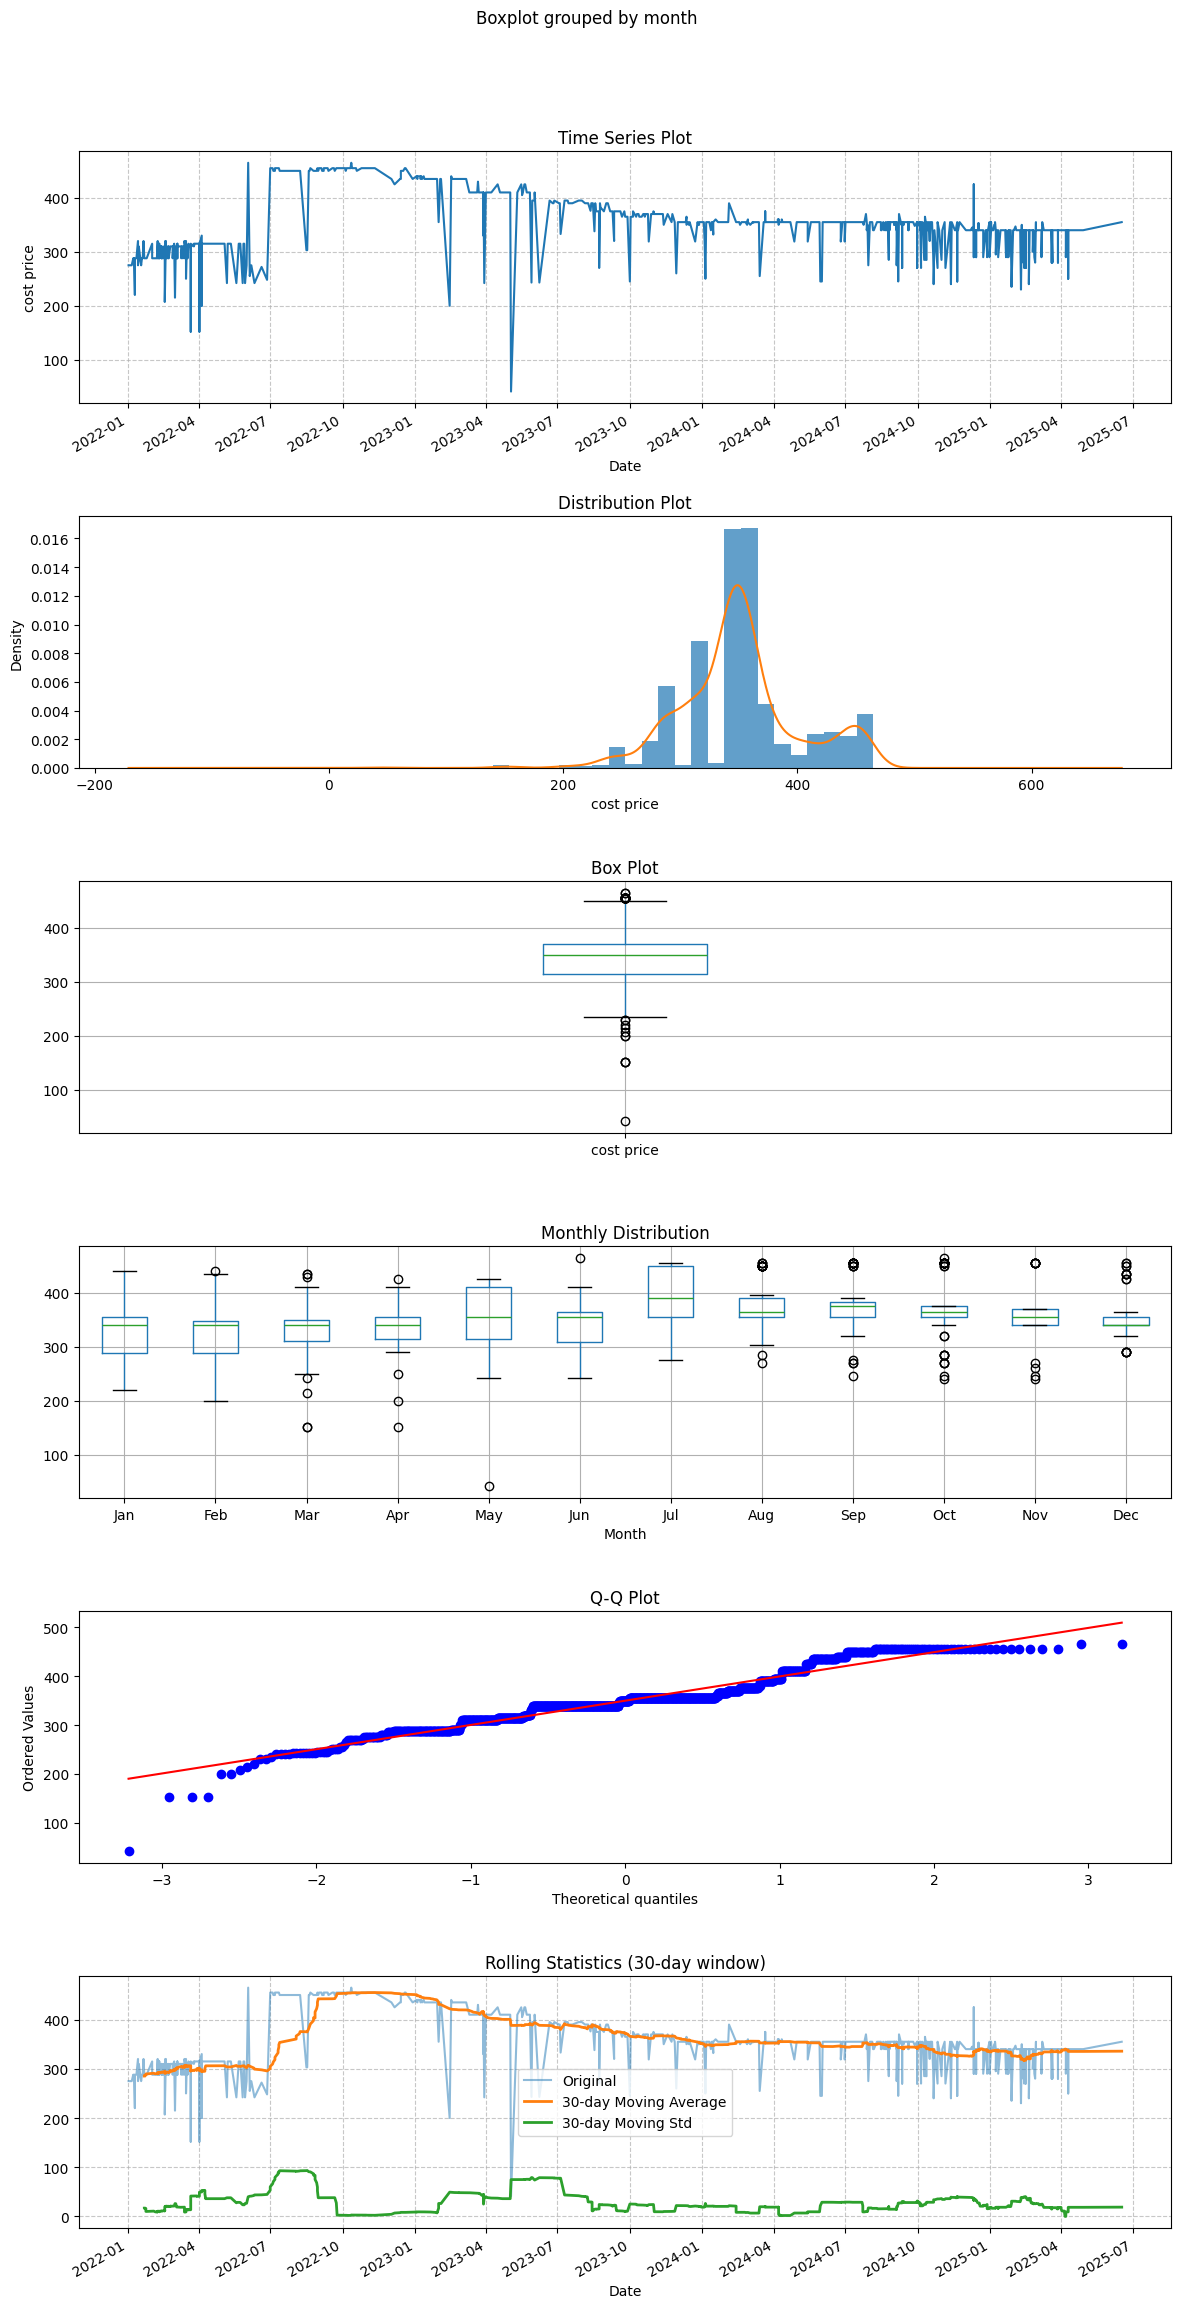

In [116]:
visualize_time_series(product_dataframes, best_selling_products.index[5], 'cost price')

#### Make timeseries data stationary

In [124]:
def check_stationarity(series):
    """Test stationarity of a time series"""
    # Perform ADF test
    result = adfuller(series.dropna())
    
    print('Augmented Dickey-Fuller Test:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
        
    return result[1] < 0.05  # Return True if stationary

def make_stationary(data, product_id, column_name, seasonal_diff=12):
    """Transform time series data to achieve stationarity"""
    df = data[product_id].copy()
    series = df[column_name]
    
    # Dictionary to store all transformations
    transformations = {}
    transformations['original'] = series  # Keep for visualization only
    
    # 1. First Difference
    transformations['first_diff'] = series.diff().dropna()
    
    # 2. Seasonal Difference (12 months)
    transformations['seasonal_diff'] = series.diff(seasonal_diff).dropna()
    
    # 3. Log Transform + First Difference
    if series.min() > 0:  # Only if all values are positive
        log_series = np.log(series)
        transformations['log_diff'] = log_series.diff().dropna()
    
    # 4. Percentage Change
    pct_change = series.pct_change()
    transformations['pct_change'] = pct_change[np.isfinite(pct_change)].dropna()
    
    # Test stationarity for each transformation
    results = {}
    for name, transformed_series in transformations.items():
        # Skip original series for stationarity selection
        if name == 'original':
            results[name] = {'series': transformed_series, 'is_stationary': False}
            continue
            
        # Clean infinite values and handle missing data
        clean_series = transformed_series[np.isfinite(transformed_series)]
        if len(clean_series) > 0:  # Only test if we have valid data
            print(f"\nTesting stationarity for {name} transformation:")
            is_stationary = check_stationarity(clean_series)
            results[name] = {
                'series': clean_series,
                'is_stationary': is_stationary
            }
        else:
            results[name] = {'series': transformed_series, 'is_stationary': False}
    
    # Find best transformation (first one that achieves stationarity)
    best_transform = None
    for name, result in results.items():
        if name != 'original' and result['is_stationary']:
            best_transform = name
            break
    
    # If no transformation achieves stationarity, use first difference as default
    if best_transform is None:
        best_transform = 'first_diff'
        print("\nWarning: No transformation achieved stationarity. Using first difference by default.")
    
    print('Selected transformation:', best_transform)
    
    # Visualize original vs transformed data
    fig = plt.figure(figsize=(15, 10))
    fig.suptitle(f'Stationarity Analysis - {product_id}\n{column_name}', y=0.95)
    
    # Plot original vs best transformation
    ax1 = plt.subplot(211)
    results['original']['series'].plot(ax=ax1, label='Original')
    ax1.set_title('Original Time Series')
    ax1.grid(True)
    
    ax2 = plt.subplot(212)
    results[best_transform]['series'].plot(ax=ax2, label=f'Best Transform ({best_transform})')
    ax2.set_title(f'Transformed Time Series - {best_transform}')
    ax2.grid(True)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
    return results[best_transform]['series']

In [125]:
stationary_timeseries_data = {product: None for product in best_selling_products.index}
stationary_timeseries_data

{'P003': None,
 'P001': None,
 'P012': None,
 'P002': None,
 'P007': None,
 'P004': None}

##### Product: P003


Processing P003:

Testing stationarity for first_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -14.66634934472556
p-value: 3.319728193861307e-27
Critical values:
	1%: -3.4344487706424953
	5%: -2.8633503662338877
	10%: -2.567733803393165

Testing stationarity for seasonal_diff transformation:


Augmented Dickey-Fuller Test:
ADF Statistic: -13.622223735731337
p-value: 1.7876205397266308e-25
Critical values:
	1%: -3.434479833188833
	5%: -2.8633640766248742
	10%: -2.567741104112434

Testing stationarity for log_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -14.016425024591664
p-value: 3.635990405272299e-26
Critical values:
	1%: -3.4344487706424953
	5%: -2.8633503662338877
	10%: -2.567733803393165

Testing stationarity for pct_change transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -14.016425024591664
p-value: 3.635990405272299e-26
Critical values:
	1%: -3.4344487706424953
	5%: -2.8633503662338877
	10%: -2.567733803393165

Testing stationarity for pct_change transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -46.38766006978608
p-value: 0.0
Critical values:
	1%: -3.4343930197503107
	5%: -2.8633257585414
	10%: -2.567720699969517
Selected transformation: first_diff
Augmented Dickey-Fuller Test:
ADF Statistic: -46.38766006978608
p-value: 0.0


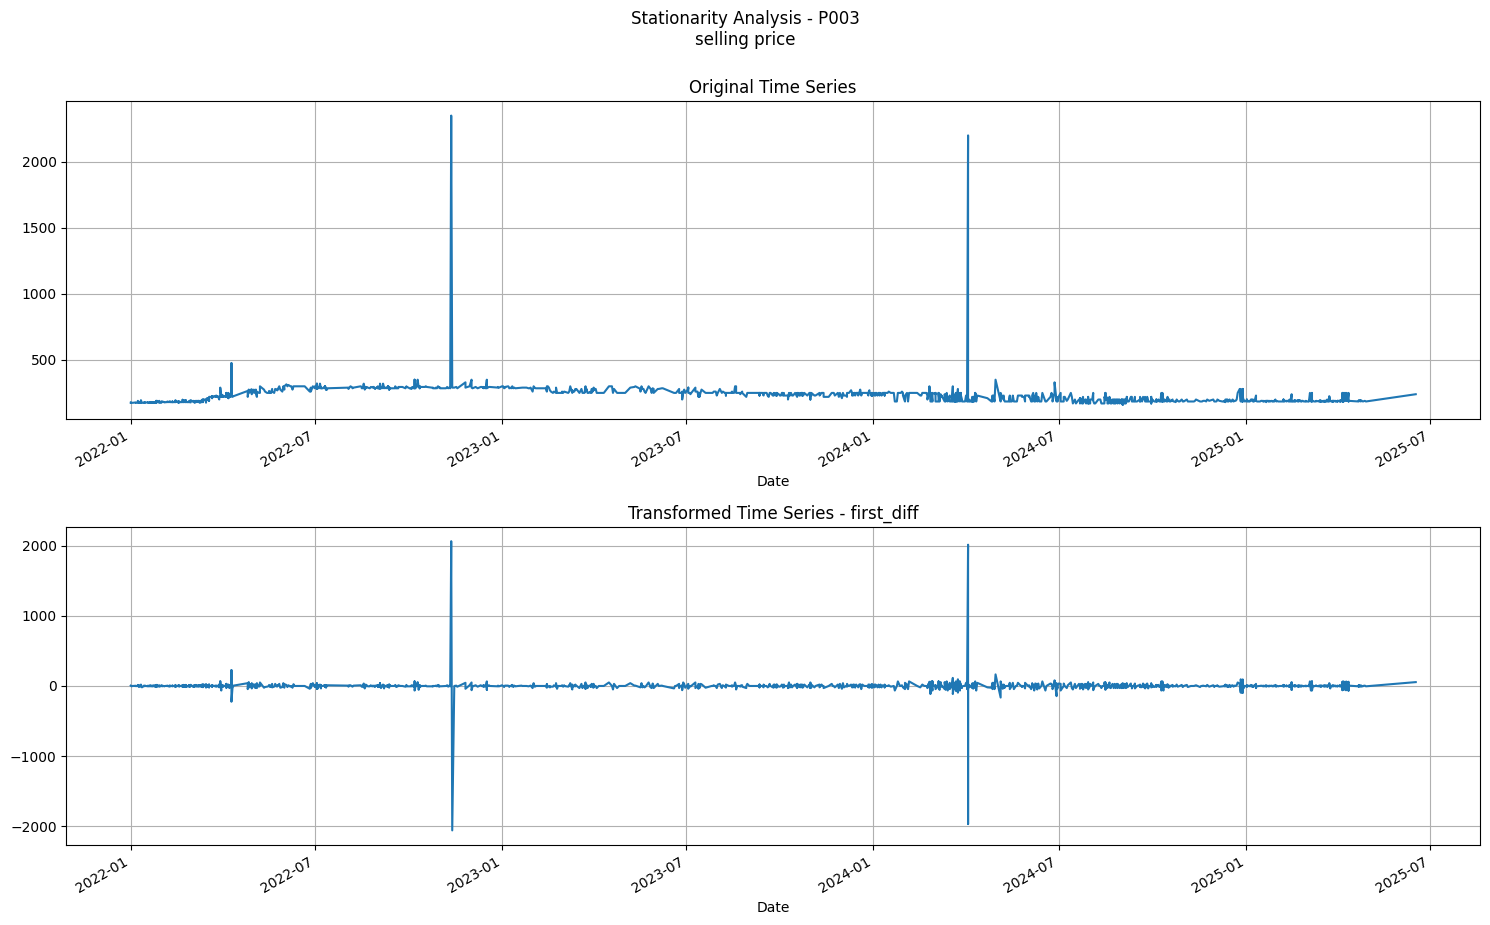


Testing stationarity for first_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -18.512392930996338
p-value: 2.1137322905206585e-30
Critical values:
	1%: -3.4344131164513874
	5%: -2.8633346290071326
	10%: -2.5677254234217317

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -18.512392930996338
p-value: 2.1137322905206585e-30
Critical values:
	1%: -3.4344131164513874
	5%: -2.8633346290071326
	10%: -2.5677254234217317

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -7.422105770393459
p-value: 6.694375070876831e-11
Critical values:
	1%: -3.4344850561115794
	5%: -2.8633663819052977
	10%: -2.567742331665774

Testing stationarity for log_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -7.422105770393459
p-value: 6.694375070876831e-11
Critical values:
	1%: -3.4344850561115794
	5%: -2.8633663819052977
	10%: -2.567742331665774

Testing stationarity for log_

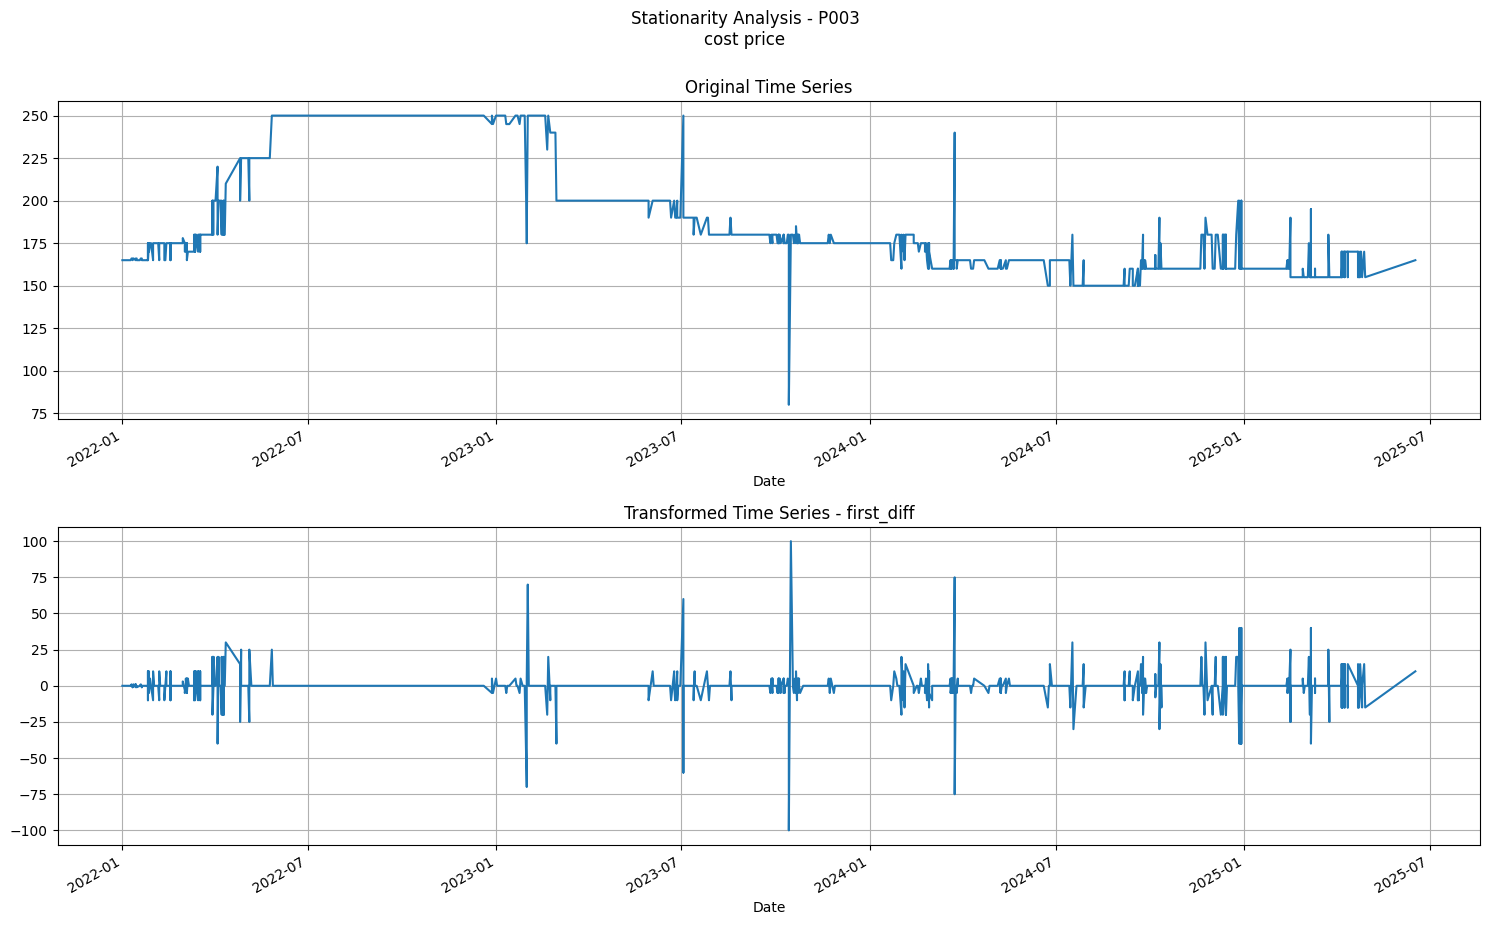

In [126]:
product_id = best_selling_products.index[0]

print(f"\nProcessing {product_id}:")
stationary_selling = make_stationary(product_dataframes, product_id, 'selling price')
stationary_cost = make_stationary(product_dataframes, product_id, 'cost price')
stationary_timeseries_data[product_id] = {
    'selling': stationary_selling,
    'cost': stationary_cost
}

##### Product: P001


Processing P001:

Testing stationarity for first_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -17.358977298145177
p-value: 5.217421617800169e-30
Critical values:
	1%: -3.4356175602072545
	5%: -2.8638661490437025
	10%: -2.5680084710921105

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -6.094045644846521
p-value: 1.0201510165698452e-07
Critical values:
	1%: -3.435721403593803
	5%: -2.863911965076372
	10%: -2.568032870868046

Testing stationarity for log_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -17.254915994409345
p-value: 5.9912058374294796e-30
Critical values:
	1%: -3.4356175602072545
	5%: -2.8638661490437025
	10%: -2.5680084710921105

Testing stationarity for pct_change transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -13.407529786530123
p-value: 4.439920467875269e-25
Critical values:
	1%: -3.435621806786881
	5%: -2.8638680226791444
	10%: -2.5680094689100477
Selected transfo

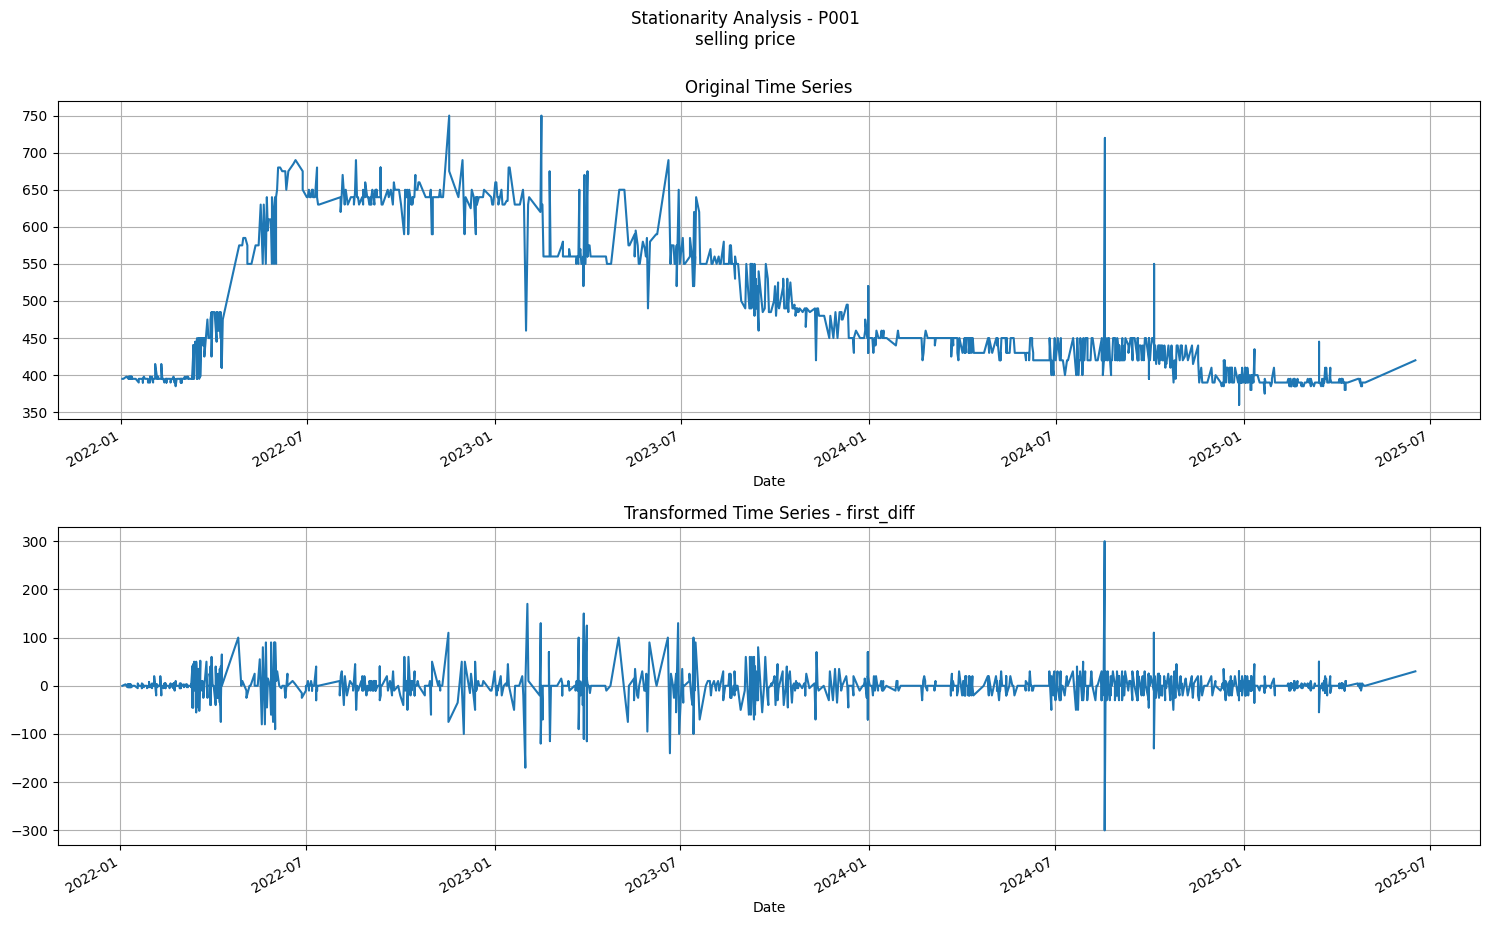


Testing stationarity for first_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -8.824388633869926
p-value: 1.8403232263991464e-14
Critical values:
	1%: -3.4356646522289815
	5%: -2.863886926389418
	10%: -2.568019536239491

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -6.684585232277195
p-value: 4.257721233361009e-09
Critical values:
	1%: -3.435721403593803
	5%: -2.863911965076372
	10%: -2.568032870868046

Testing stationarity for log_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -9.1114226869074
p-value: 3.3913905678229663e-15
Critical values:
	1%: -3.4356646522289815
	5%: -2.863886926389418
	10%: -2.568019536239491

Testing stationarity for pct_change transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -7.820490325639433
p-value: 6.690551796189688e-12
Critical values:
	1%: -3.4356646522289815
	5%: -2.863886926389418
	10%: -2.568019536239491
Selected transformation: first_diff


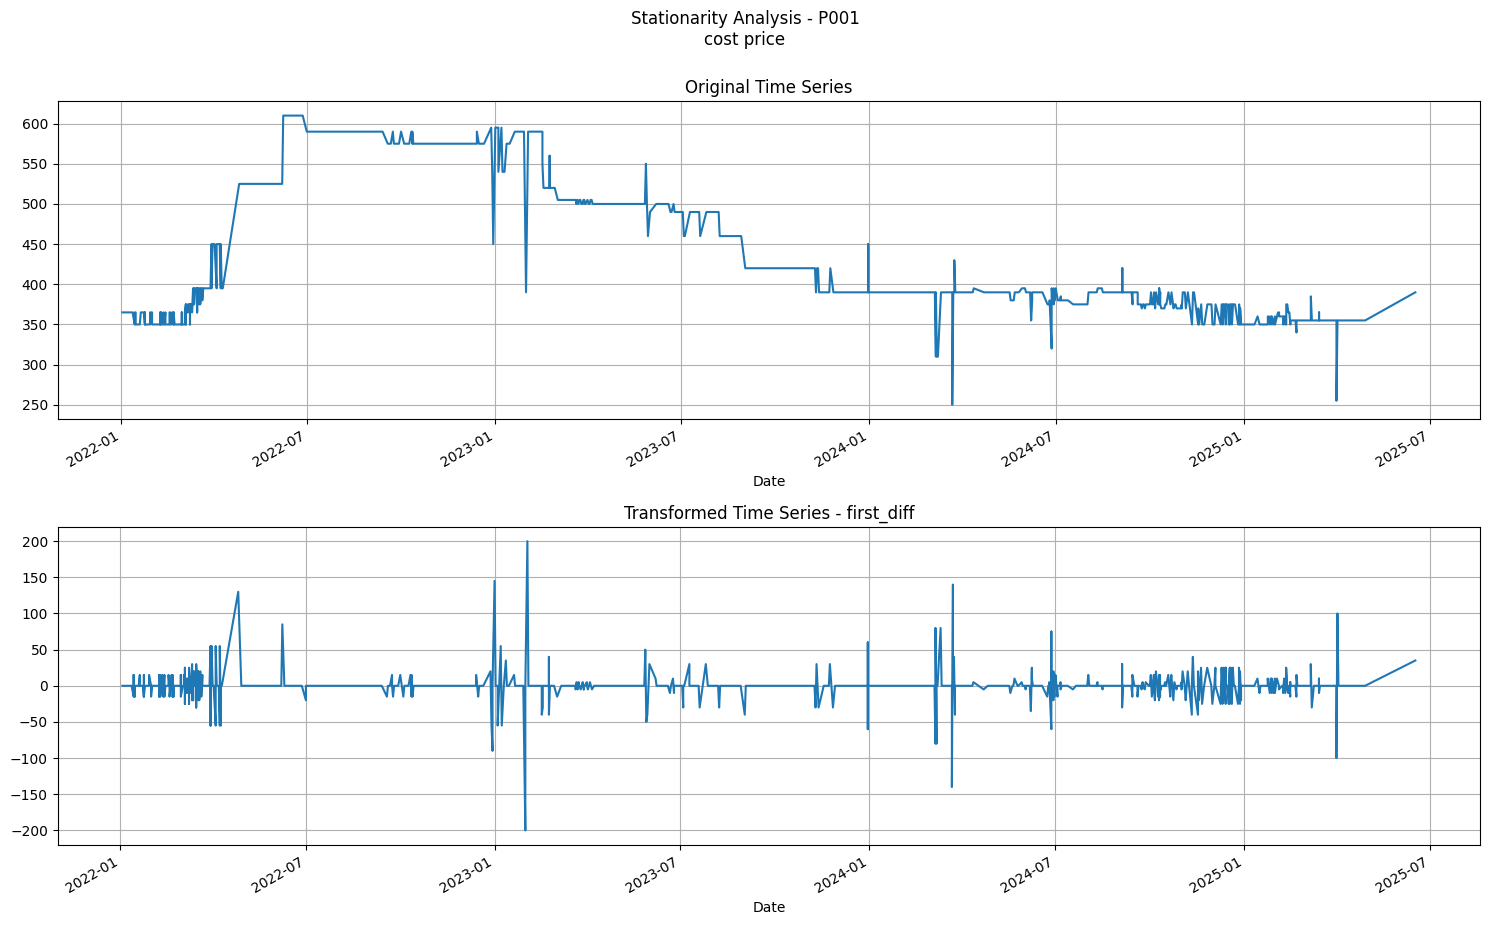

In [127]:
product_id = best_selling_products.index[1]

print(f"\nProcessing {product_id}:")
stationary_selling = make_stationary(product_dataframes, product_id, 'selling price')
stationary_cost = make_stationary(product_dataframes, product_id, 'cost price')
stationary_timeseries_data[product_id] = {
    'selling': stationary_selling,
    'cost': stationary_cost
}

##### Product: P012


Processing P012:

Testing stationarity for first_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -14.565543867383221
p-value: 4.718549703707356e-27
Critical values:
	1%: -3.4358202562873807
	5%: -2.8639555777313683
	10%: -2.568056097446774

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -14.565543867383221
p-value: 4.718549703707356e-27
Critical values:
	1%: -3.4358202562873807
	5%: -2.8639555777313683
	10%: -2.568056097446774

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -10.565125503290778
p-value: 7.551486010753878e-19
Critical values:
	1%: -3.4359086044391476
	5%: -2.863994554693699
	10%: -2.5680768554093008

Testing stationarity for log_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -10.565125503290778
p-value: 7.551486010753878e-19
Critical values:
	1%: -3.4359086044391476
	5%: -2.863994554693699
	10%: -2.5680768554093008

Testing stati

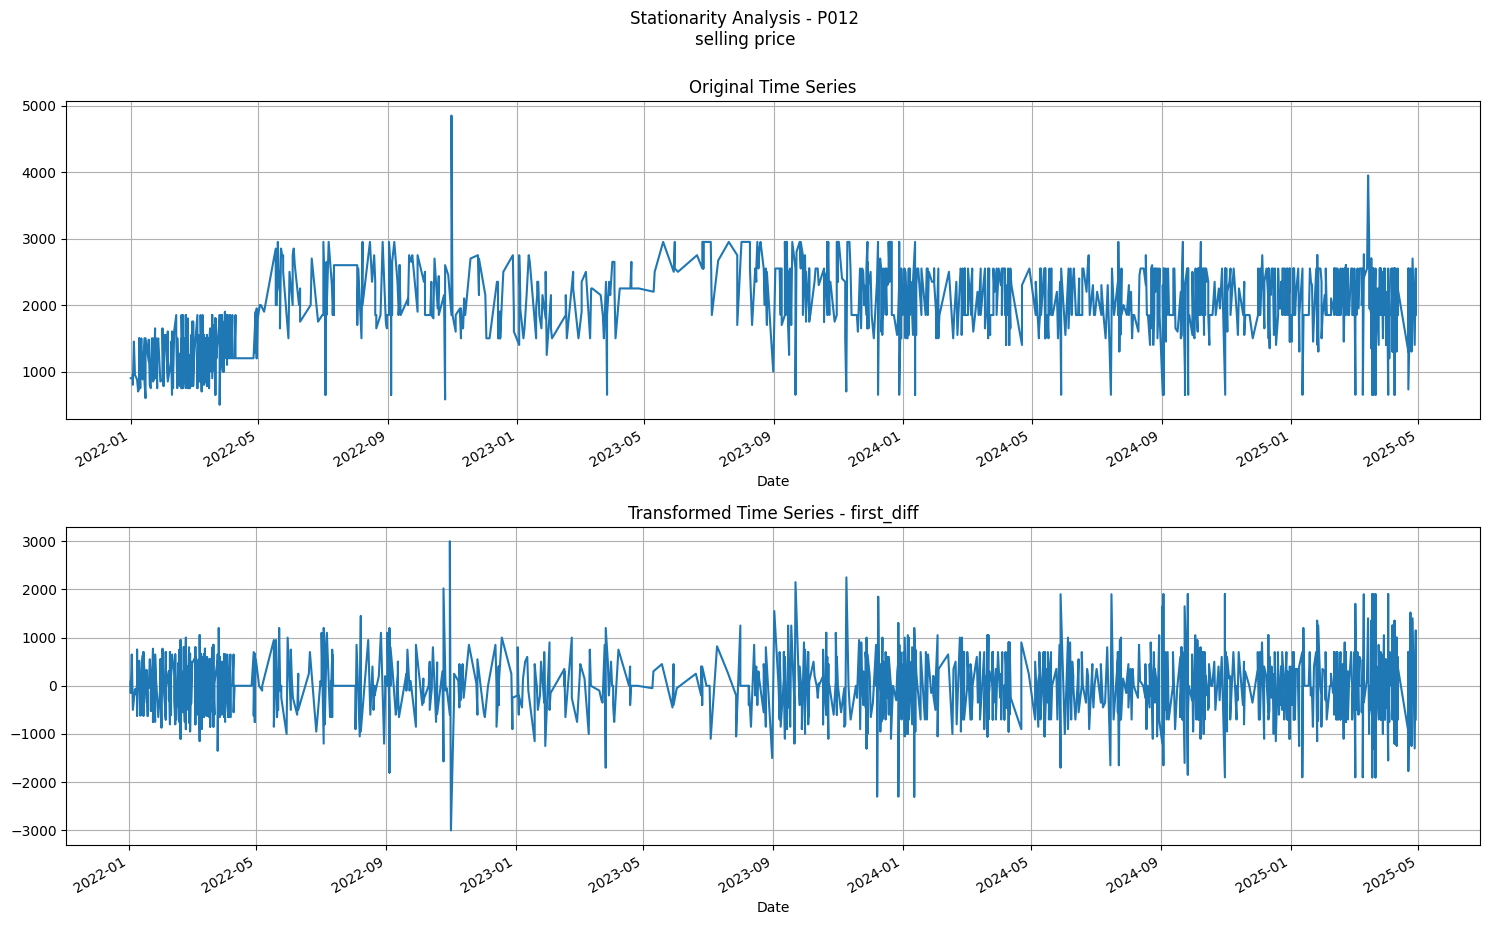


Testing stationarity for first_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -14.583398760552505
p-value: 4.4312690577420505e-27
Critical values:
	1%: -3.4358202562873807
	5%: -2.8639555777313683
	10%: -2.568056097446774

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -14.583398760552505
p-value: 4.4312690577420505e-27
Critical values:
	1%: -3.4358202562873807
	5%: -2.8639555777313683
	10%: -2.568056097446774

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -11.228275431242512
p-value: 1.935957332009372e-20
Critical values:
	1%: -3.4359086044391476
	5%: -2.863994554693699
	10%: -2.5680768554093008

Testing stationarity for pct_change transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -11.228275431242512
p-value: 1.935957332009372e-20
Critical values:
	1%: -3.4359086044391476
	5%: -2.863994554693699
	10%: -2.5680768554093008

Testing stationarity for pc

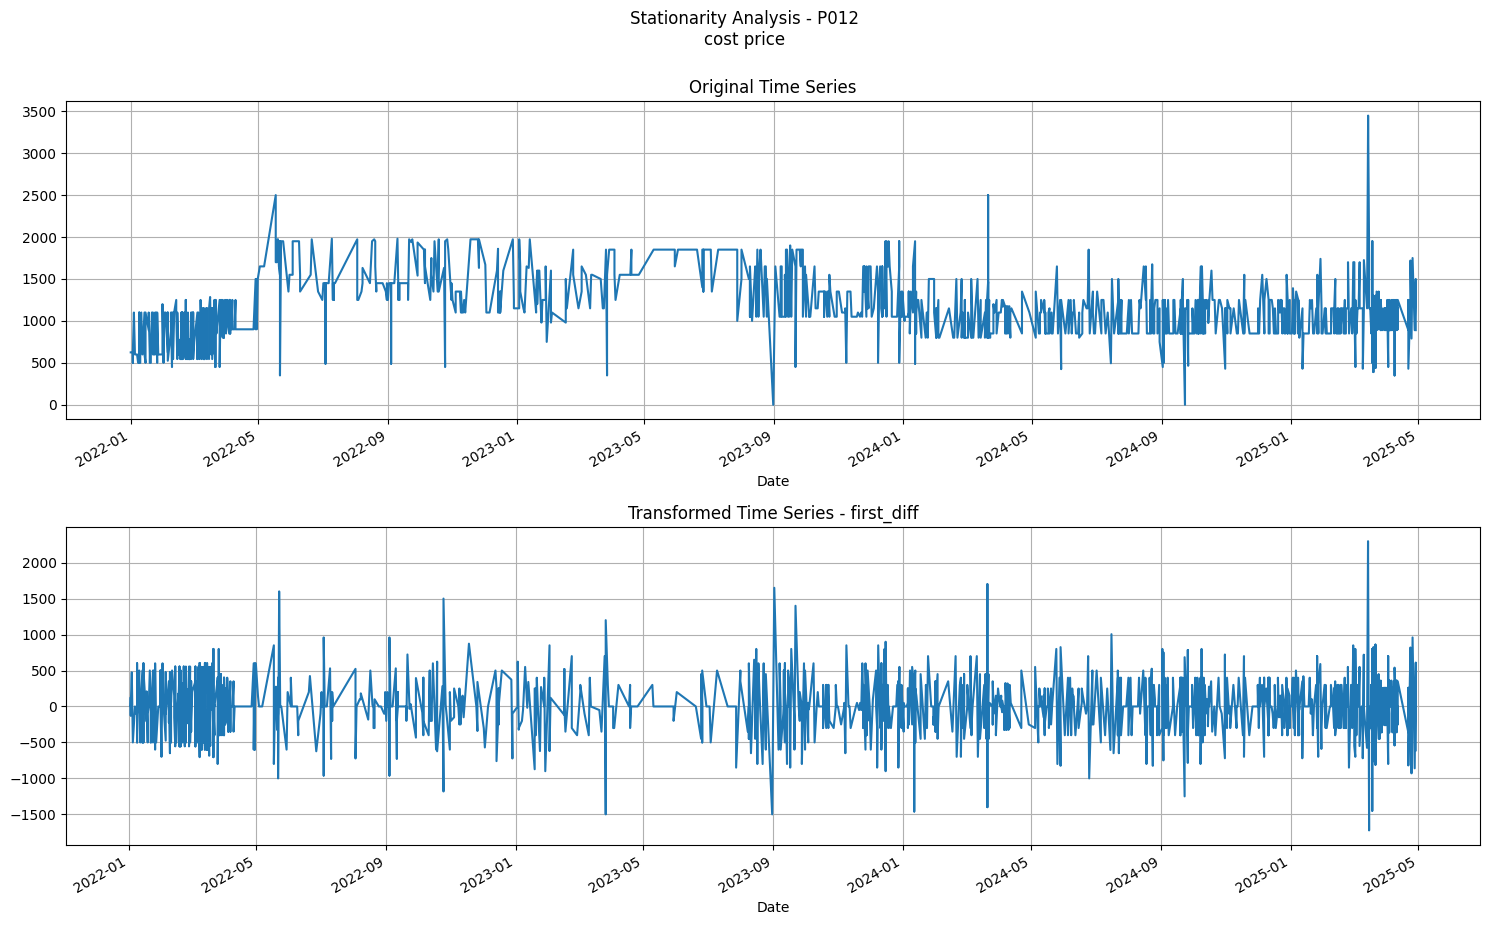

In [128]:
product_id = best_selling_products.index[2]

print(f"\nProcessing {product_id}:")
stationary_selling = make_stationary(product_dataframes, product_id, 'selling price')
stationary_cost = make_stationary(product_dataframes, product_id, 'cost price')
stationary_timeseries_data[product_id] = {
    'selling': stationary_selling,
    'cost': stationary_cost
}

##### Product: P002


Processing P002:

Testing stationarity for first_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -11.50214412437359
p-value: 4.464874710075226e-21
Critical values:
	1%: -3.4361042569951805
	5%: -2.8640808675675826
	10%: -2.568122823703617

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -11.50214412437359
p-value: 4.464874710075226e-21
Critical values:
	1%: -3.4361042569951805
	5%: -2.8640808675675826
	10%: -2.568122823703617

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -8.627081357833752
p-value: 5.890574167965273e-14
Critical values:
	1%: -3.4361864296062166
	5%: -2.864117116658563
	10%: -2.5681421294173714

Testing stationarity for log_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -13.161722235754722
p-value: 1.3032473489689466e-24
Critical values:
	1%: -3.4360991979671205
	5%: -2.864078635828568
	10%: -2.568121635118498

Testing stationa

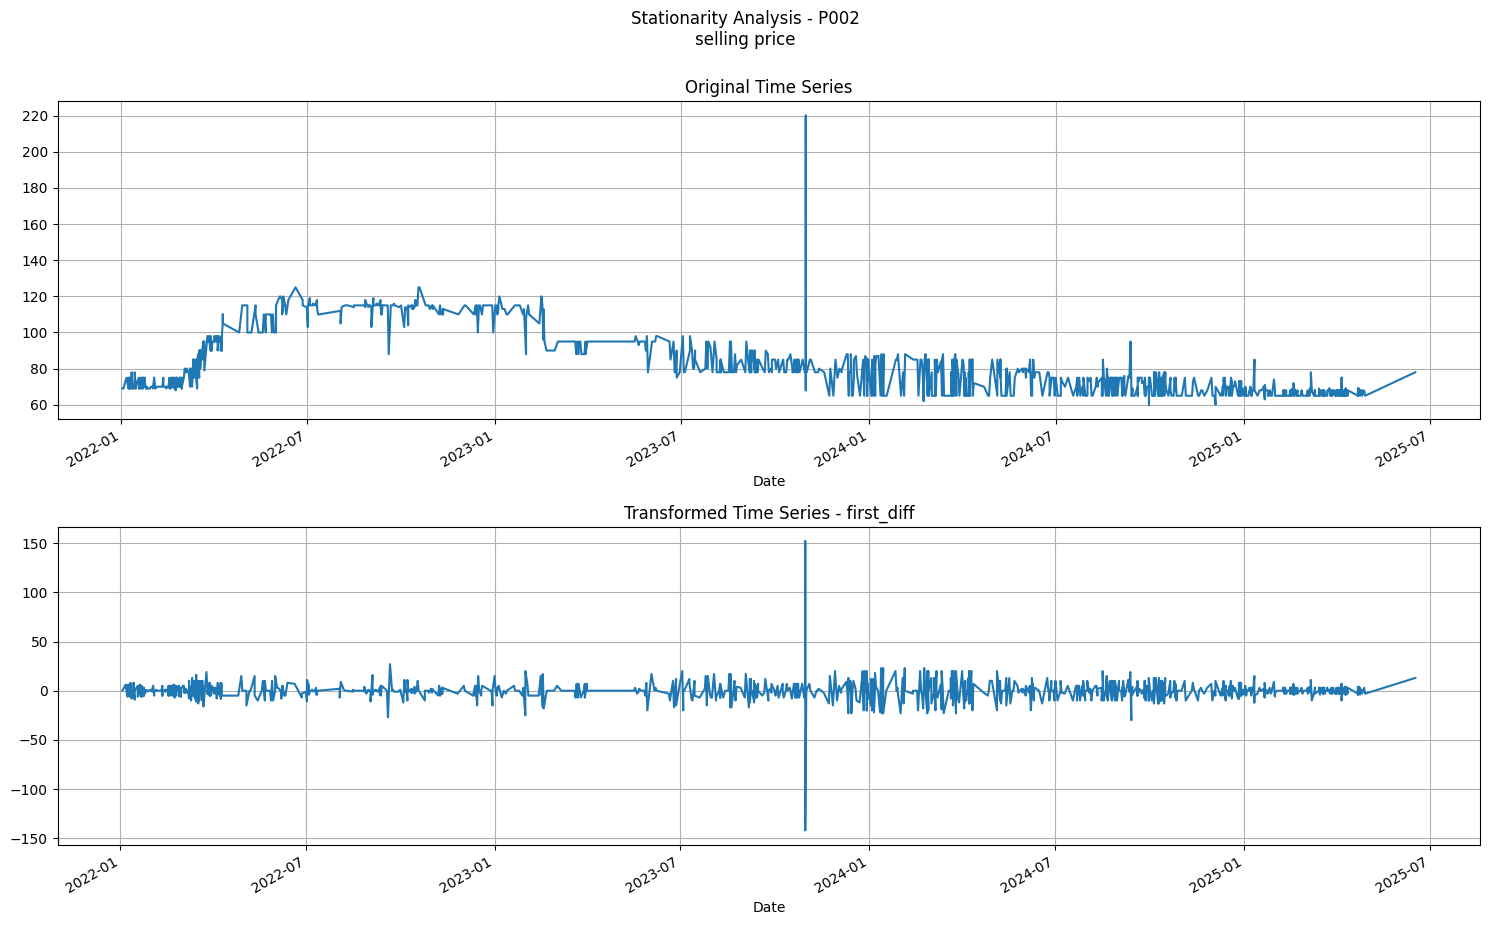


Testing stationarity for first_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -16.794037667630057
p-value: 1.2353866070373714e-29
Critical values:
	1%: -3.4360590437486405
	5%: -2.864060922068716
	10%: -2.5681122011011426

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -6.621119727906709
p-value: 6.033589390379471e-09
Critical values:
	1%: -3.4361864296062166
	5%: -2.864117116658563
	10%: -2.5681421294173714

Testing stationarity for log_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -16.794037667630057
p-value: 1.2353866070373714e-29
Critical values:
	1%: -3.4360590437486405
	5%: -2.864060922068716
	10%: -2.5681122011011426

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -6.621119727906709
p-value: 6.033589390379471e-09
Critical values:
	1%: -3.4361864296062166
	5%: -2.864117116658563
	10%: -2.5681421294173714

Testing stationarity for log_di

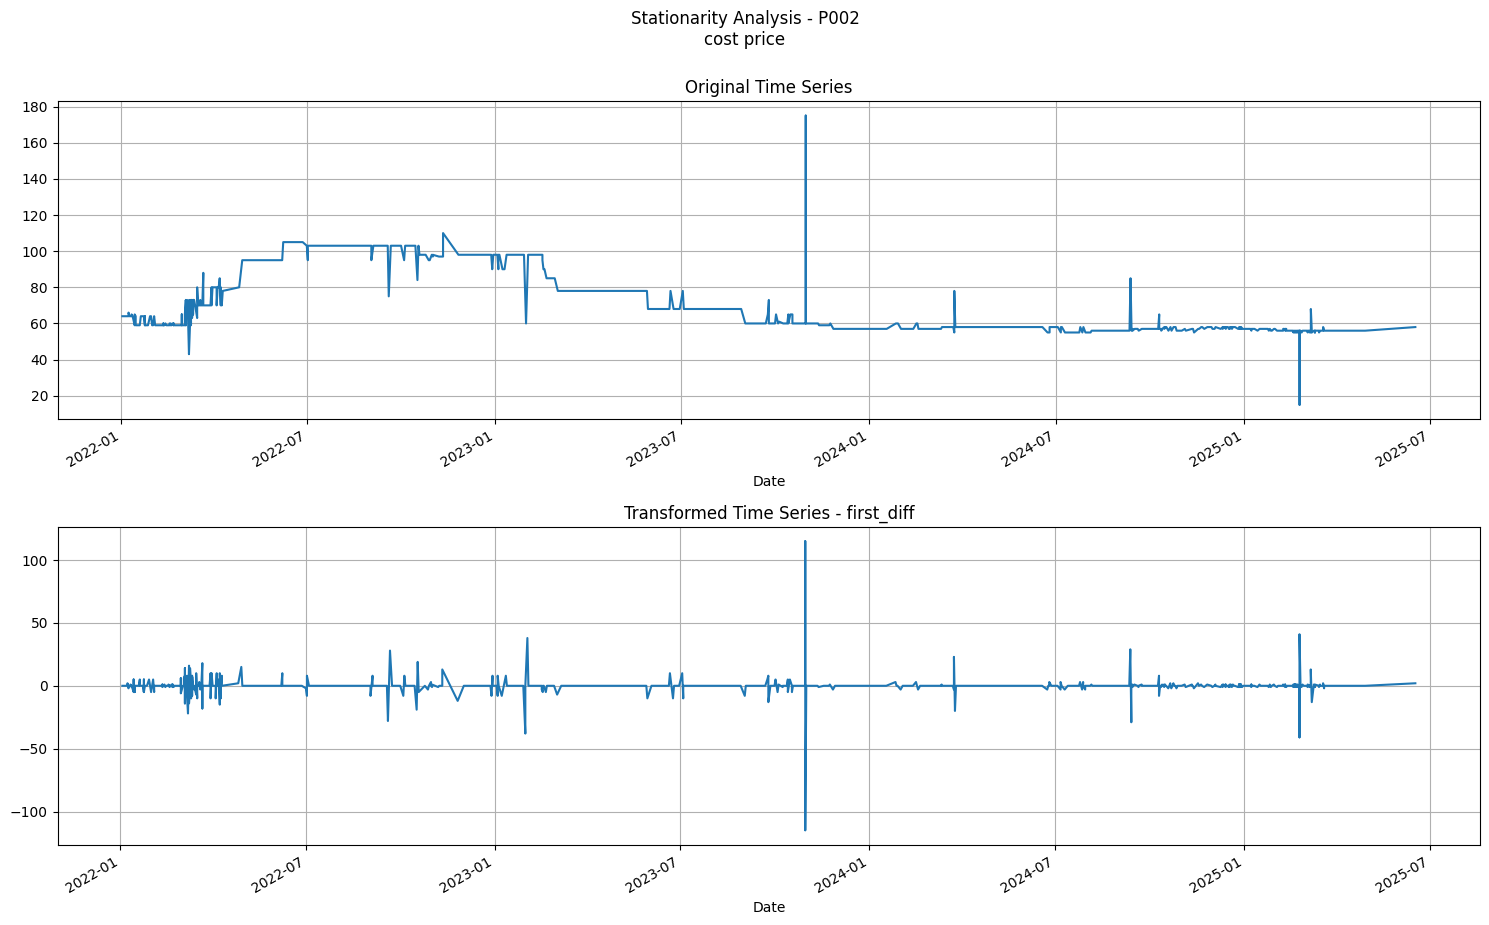

In [131]:
product_id = best_selling_products.index[3]

print(f"\nProcessing {product_id}:")
stationary_selling = make_stationary(product_dataframes, product_id, 'selling price')
stationary_cost = make_stationary(product_dataframes, product_id, 'cost price')
stationary_timeseries_data[product_id] = {
    'selling': stationary_selling,
    'cost': stationary_cost
}

##### Product: P007


Processing P007:

Testing stationarity for first_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -8.436035613712068
p-value: 1.8156744699510602e-13
Critical values:
	1%: -3.436369082756128
	5%: -2.8641976875421524
	10%: -2.5681850407995137

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -8.436035613712068
p-value: 1.8156744699510602e-13
Critical values:
	1%: -3.436369082756128
	5%: -2.8641976875421524
	10%: -2.5681850407995137

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -7.8071651856207795
p-value: 7.229923697765688e-12
Critical values:
	1%: -3.436441978605957
	5%: -2.864229841568573
	10%: -2.5682021659802934

Testing stationarity for log_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -10.667257296782774
p-value: 4.255790791783867e-19
Critical values:
	1%: -3.436325084538422
	5%: -2.8641782797532214
	10%: -2.5681747043025274

Testing statio

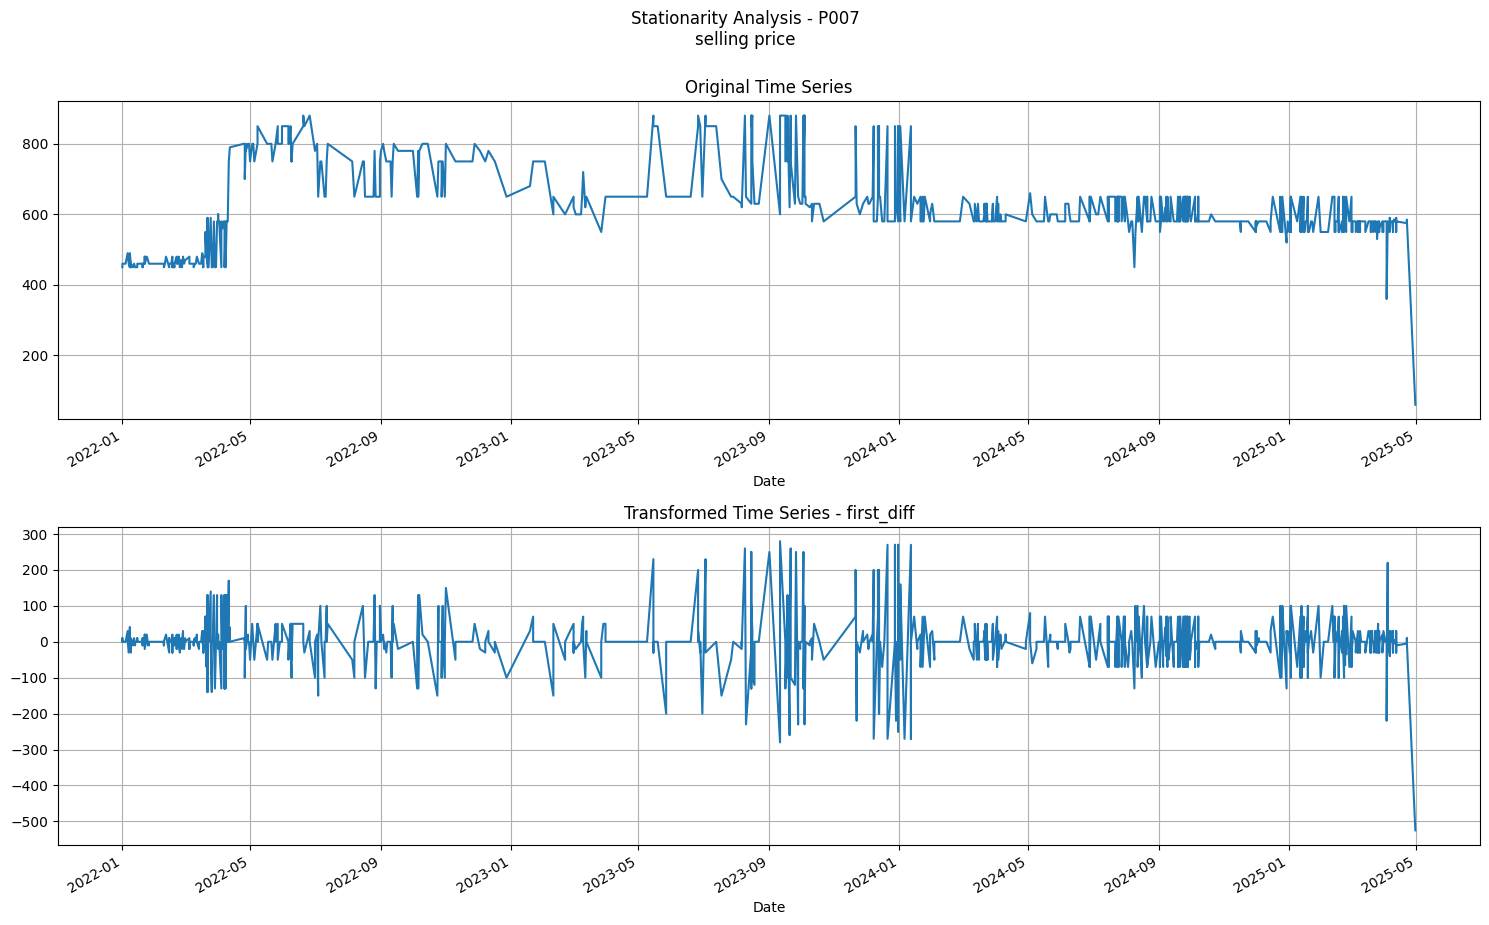


Testing stationarity for first_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -12.427941007714171
p-value: 3.99980956915384e-23
Critical values:
	1%: -3.4363470029475525
	5%: -2.864187948086107
	10%: -2.568179853605536

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -12.427941007714171
p-value: 3.99980956915384e-23
Critical values:
	1%: -3.4363470029475525
	5%: -2.864187948086107
	10%: -2.568179853605536

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -10.522924552179779
p-value: 9.579058959287263e-19
Critical values:
	1%: -3.436391325753478
	5%: -2.864207498909067
	10%: -2.5681902663042324

Testing stationarity for log_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -12.27788800170747
p-value: 8.351740073932841e-23
Critical values:
	1%: -3.436325084538422
	5%: -2.8641782797532214
	10%: -2.5681747043025274

Testing stationarity for pct_change t

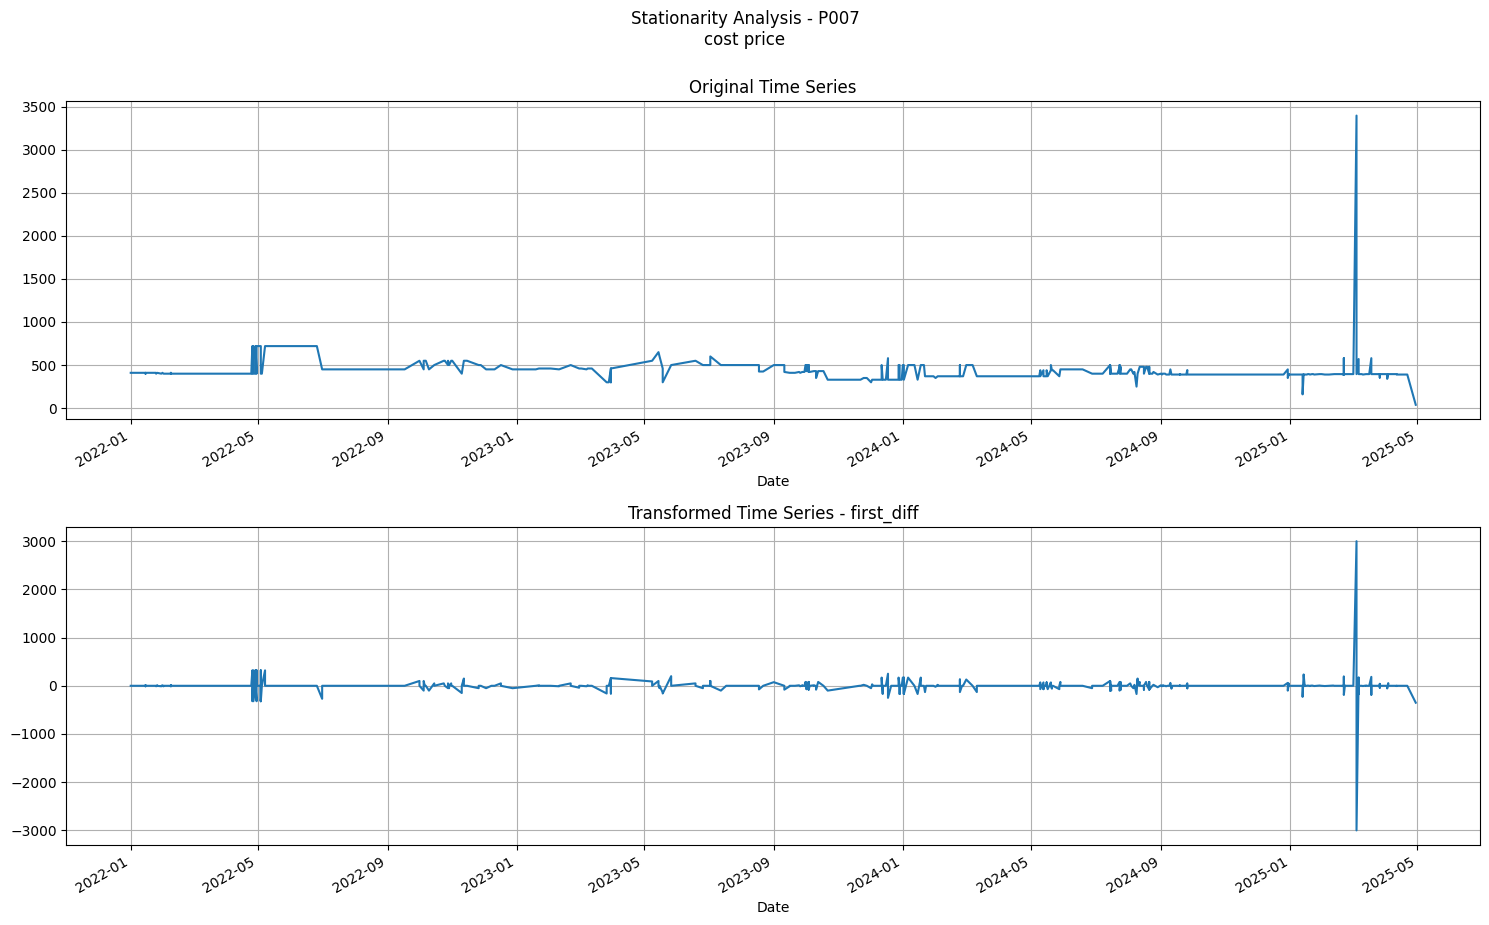

In [133]:
product_id = best_selling_products.index[4]

print(f"\nProcessing {product_id}:")
stationary_selling = make_stationary(product_dataframes, product_id, 'selling price')
stationary_cost = make_stationary(product_dataframes, product_id, 'cost price')
stationary_timeseries_data[product_id] = {
    'selling': stationary_selling,
    'cost': stationary_cost
}

##### Product: P004


Processing P004:

Testing stationarity for first_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -13.40398847963133
p-value: 4.508145580226427e-25
Critical values:
	1%: -3.4366111317433443
	5%: -2.864304451252086
	10%: -2.5682419034417707

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -16.60455568901145
p-value: 1.752511725666209e-29
Critical values:
	1%: -3.436635203238866
	5%: -2.8643150683130307
	10%: -2.568247558190521

Testing stationarity for log_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -13.40398847963133
p-value: 4.508145580226427e-25
Critical values:
	1%: -3.4366111317433443
	5%: -2.864304451252086
	10%: -2.5682419034417707

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -16.60455568901145
p-value: 1.752511725666209e-29
Critical values:
	1%: -3.436635203238866
	5%: -2.8643150683130307
	10%: -2.568247558190521

Testing stationarit

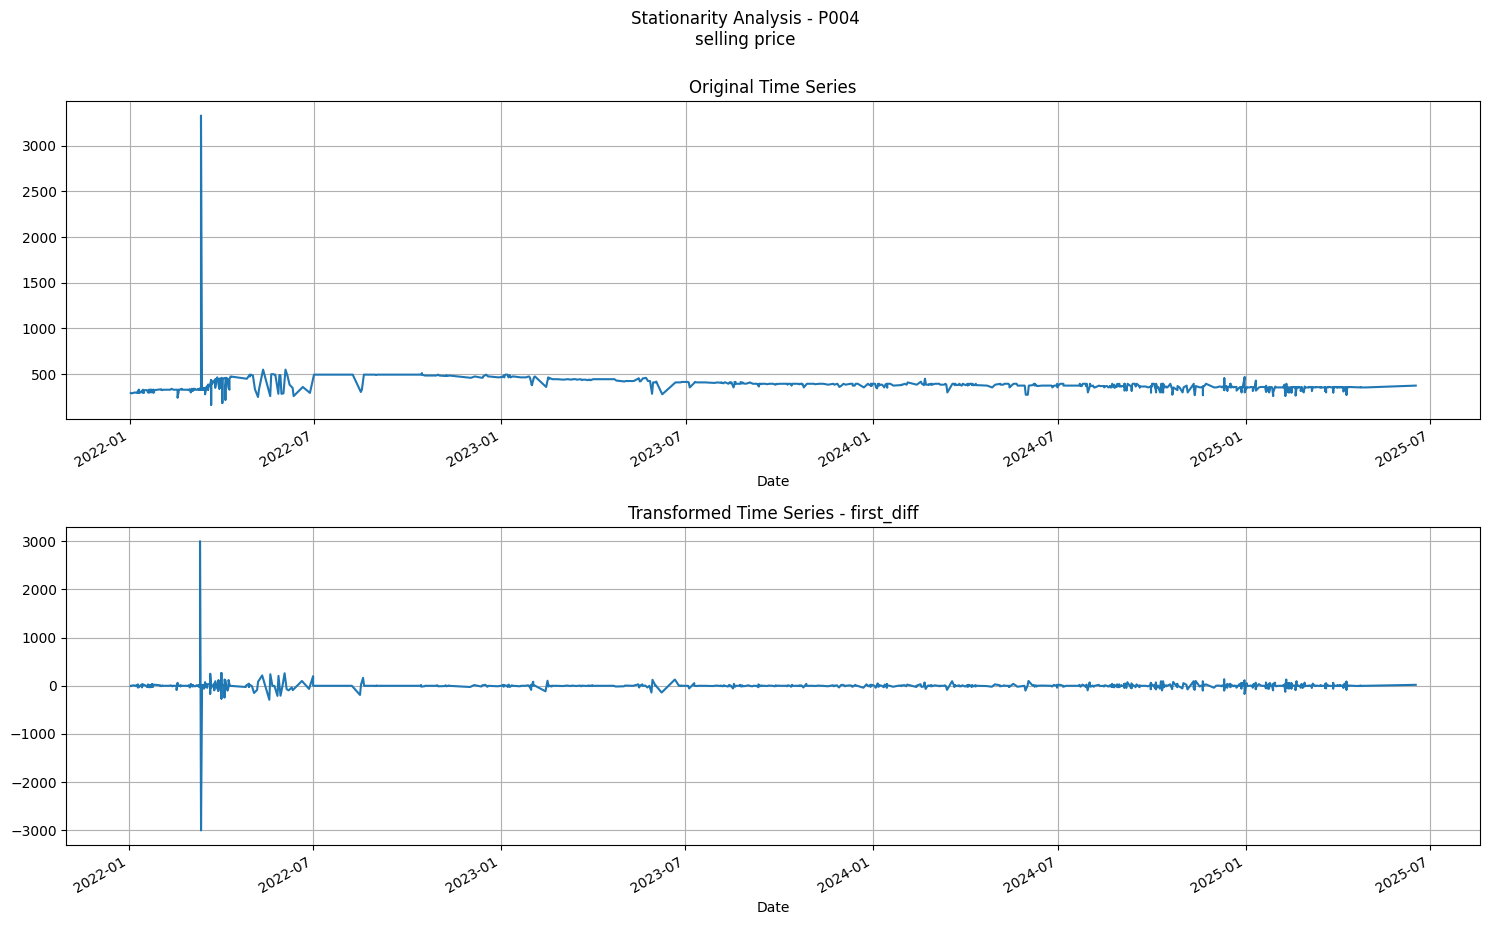


Testing stationarity for first_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -12.639749159684161
p-value: 1.443599437847232e-23
Critical values:
	1%: -3.436605142651622
	5%: -2.8643018096684587
	10%: -2.568240496510984

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -12.639749159684161
p-value: 1.443599437847232e-23
Critical values:
	1%: -3.436605142651622
	5%: -2.8643018096684587
	10%: -2.568240496510984

Testing stationarity for seasonal_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -6.932748643213384
p-value: 1.0736430878995576e-09
Critical values:
	1%: -3.4367023644255537
	5%: -2.864344690221488
	10%: -2.5682633351736674

Testing stationarity for log_diff transformation:
Augmented Dickey-Fuller Test:
ADF Statistic: -6.932748643213384
p-value: 1.0736430878995576e-09
Critical values:
	1%: -3.4367023644255537
	5%: -2.864344690221488
	10%: -2.5682633351736674

Testing stationarity for log_diff

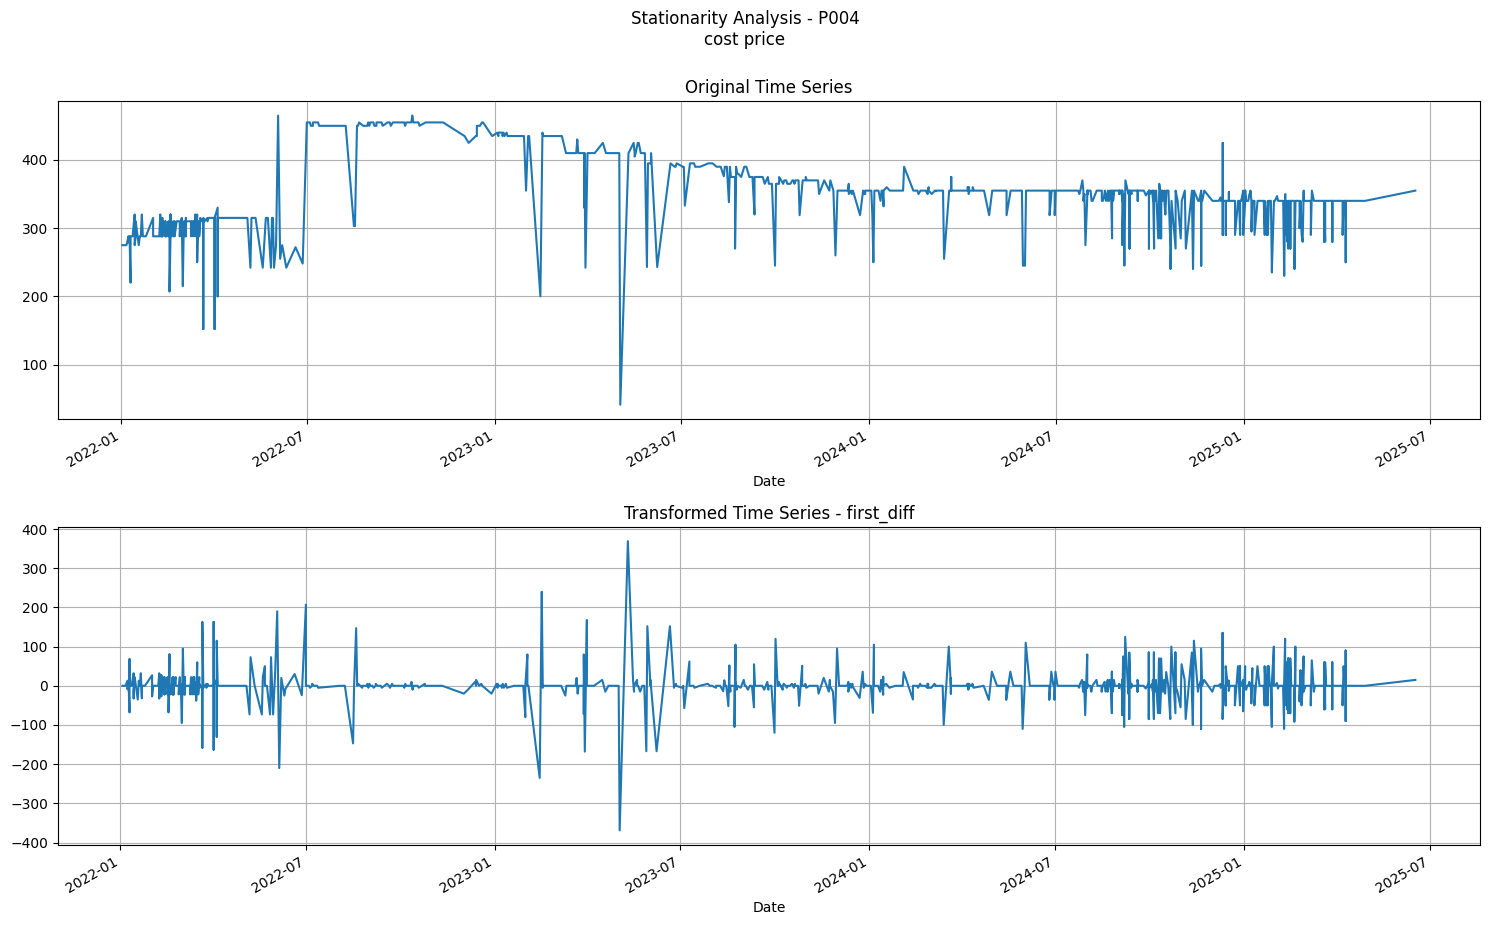

In [135]:
product_id = best_selling_products.index[5]

print(f"\nProcessing {product_id}:")
stationary_selling = make_stationary(product_dataframes, product_id, 'selling price')
stationary_cost = make_stationary(product_dataframes, product_id, 'cost price')
stationary_timeseries_data[product_id] = {
    'selling': stationary_selling,
    'cost': stationary_cost
}

#### Collection of product-wise STDs, Means and last values

In [15]:
data_dir_path = '../../data/preprocessed/final-phase/'

# Collect product statistics
product_stats = {}

for product_id in best_selling_products.index:
    df = product_dataframes[product_id]
    
    product_stats[product_id] = {
        'selling': {
            'std': float(df['selling price'].std()),
            'mean': float(df['selling price'].mean()),
            'last_value': float(df['selling price'].iloc[-1])
        },
        'cost': {
            'std': float(df['cost price'].std()),
            'mean': float(df['cost price'].mean()),
            'last_value': float(df['cost price'].iloc[-1])
        }
    }

# Display formatted dictionary
from pprint import pprint
print("Product Statistics:")
pprint(product_stats, indent=4)

# Save statistics using joblib
stats_file = os.path.join(data_dir_path, 'product_statistics2.joblib')
joblib.dump(product_stats, stats_file)

print(f"\nStatistics saved to: {stats_file}")

# Verify saved data
loaded_stats = joblib.load(stats_file)
print("\nVerification - Loaded statistics match original:", 
      all(loaded_stats[k] == v for k, v in product_stats.items()))

Product Statistics:
{   'P001': {   'cost': {   'last_value': 390.0,
                            'mean': 420.5015923566879,
                            'std': 79.65405278422698},
                'selling': {   'last_value': 420.0,
                               'mean': 473.2300955414013,
                               'std': 90.3363193821443}},
    'P002': {   'cost': {   'last_value': 58.0,
                            'mean': 66.82398619499568,
                            'std': 15.706727522007455},
                'selling': {   'last_value': 78.0,
                               'mean': 81.17601380500432,
                               'std': 16.802368787679434}},
    'P003': {   'cost': {   'last_value': 165.0,
                            'mean': 183.95561035758323,
                            'std': 32.35739657110575},
                'selling': {   'last_value': 240.0,
                               'mean': 227.70900123304563,
                               'std': 83.3627329744592

#### Export preprocessed timeseries data

In [144]:
data_dir_path = '../../data/preprocessed/final-phase'

# Create base directory if not exists
if not os.path.exists(data_dir_path):
    os.makedirs(data_dir_path)
    print(f"Created directory: {data_dir_path}")

# Export each product's stationary selling and cost price data to separate CSV files
for product_id, data in stationary_timeseries_data.items():
    product_dir = os.path.join(data_dir_path, product_id)
    
    # Create product-specific directory if not exists
    if not os.path.exists(product_dir):
        os.makedirs(product_dir)
        print(f"Created directory: {product_dir}")
    
    # Export selling price data
    selling_file = os.path.join(product_dir, 'selling_price_stationary.csv')
    data['selling'].to_csv(selling_file, header=True)
    print(f"Exported selling price data to: {selling_file}")
    
    # Export cost price data
    cost_file = os.path.join(product_dir, 'cost_price_stationary.csv')
    data['cost'].to_csv(cost_file, header=True)
    print(f"Exported cost price data to: {cost_file}")

Created directory: ../../data/preprocessed/final-phase\P003
Exported selling price data to: ../../data/preprocessed/final-phase\P003\selling_price_stationary.csv
Exported cost price data to: ../../data/preprocessed/final-phase\P003\cost_price_stationary.csv
Created directory: ../../data/preprocessed/final-phase\P001
Exported selling price data to: ../../data/preprocessed/final-phase\P001\selling_price_stationary.csv
Exported cost price data to: ../../data/preprocessed/final-phase\P001\cost_price_stationary.csv
Created directory: ../../data/preprocessed/final-phase\P012
Exported selling price data to: ../../data/preprocessed/final-phase\P012\selling_price_stationary.csv
Exported cost price data to: ../../data/preprocessed/final-phase\P012\cost_price_stationary.csv
Created directory: ../../data/preprocessed/final-phase\P002
Exported selling price data to: ../../data/preprocessed/final-phase\P002\selling_price_stationary.csv
Exported cost price data to: ../../data/preprocessed/final-phase

In [145]:
# Verify exported files
for product_id in stationary_timeseries_data.keys():
    product_dir = os.path.join(data_dir_path, product_id)
    selling_file = os.path.join(product_dir, 'selling_price_stationary.csv')
    cost_file = os.path.join(product_dir, 'cost_price_stationary.csv')
    
    print(f"\nProduct {product_id}:")
    print(f"Selling price file exists: {os.path.exists(selling_file)}")
    print(f"Cost price file exists: {os.path.exists(cost_file)}")


Product P003:
Selling price file exists: True
Cost price file exists: True

Product P001:
Selling price file exists: True
Cost price file exists: True

Product P012:
Selling price file exists: True
Cost price file exists: True

Product P002:
Selling price file exists: True
Cost price file exists: True

Product P007:
Selling price file exists: True
Cost price file exists: True

Product P004:
Selling price file exists: True
Cost price file exists: True
